### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [5]:
# Import necessary libraries.

import numpy as np
import pandas as pd
import pylab as py
import sklearn
import math

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy import special

import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan

from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [6]:
# Load the CSV file(s) as reviews.
reviews_df = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews_df


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [7]:
# Determine Missing Values
reviews_df.isna().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [8]:
# Handle missing values
reviews_df.dropna()


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [9]:
# Explore the data.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [10]:
# Descriptive statistics.
reviews_df.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [11]:
	
# Check for duplicates in the DataFrame. An empty DataFrame result means there are no duplicates
duplicates = reviews_df.duplicated()

# Print the rows that are duplicates (if any).
print(reviews_df[duplicates])

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []


## 2. Drop columns

In [12]:
# Drop unnecessary columns.
reviews_df.drop(columns=['language', 'platform'], inplace=True)

# View column names.
reviews_df

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 3. Rename columns

In [13]:
# Rename the column headers. # remuneration is in £k
reviews_df.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
reviews_df.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [14]:
# Create a CSV file as output.
reviews_df.to_csv('reviews.csv', index=False)


In [15]:
# Import new CSV file with Pandas.
reviews_cleaned_df = pd.read_csv('reviews.csv')

# View DataFrame.
display(reviews_cleaned_df)

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [16]:
# Sense check data with shape and info
print(reviews_cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [17]:
# Create new dataframe with the variables in question
reviews_filtered_df = pd.DataFrame(reviews_cleaned_df, columns=['age', 'remuneration', 'spending_score', 'loyalty_points'])

# View any correlations between the variables in question
reviews_filtered_df.corr()

age  remuneration  spending_score  loyalty_points
age             1.000000     -0.005708       -0.224334       -0.042445
remuneration   -0.005708      1.000000        0.005612        0.616065
spending_score -0.224334      0.005612        1.000000        0.672310
loyalty_points -0.042445      0.616065        0.672310        1.000000

#### The correlation results show:

Age and Remuneration (-0.0057): Very weak, almost no relationship — age has little effect on earnings.

Remuneration and Spending Score (0.0056): Very weak positive link — income doesn’t strongly relate to spending habits.

Age and Loyalty Points (-0.0424): Very weak negative link — age barely affects loyalty points.

Spending Score and Loyalty Points (0.6723): Moderately strong positive link — higher spenders tend to have more loyalty points, suggesting frequent or loyal customers.

Remuneration and Loyalty Points (0.6161): Moderately strong positive link — higher earners often have more loyalty points.



#### Note: Correlation shows relationships, not cause and effect. Other factors might also influence these patterns.




## Visualize the Data

In [18]:
# DataFrame changed to df for ease of coding below
df = reviews_cleaned_df

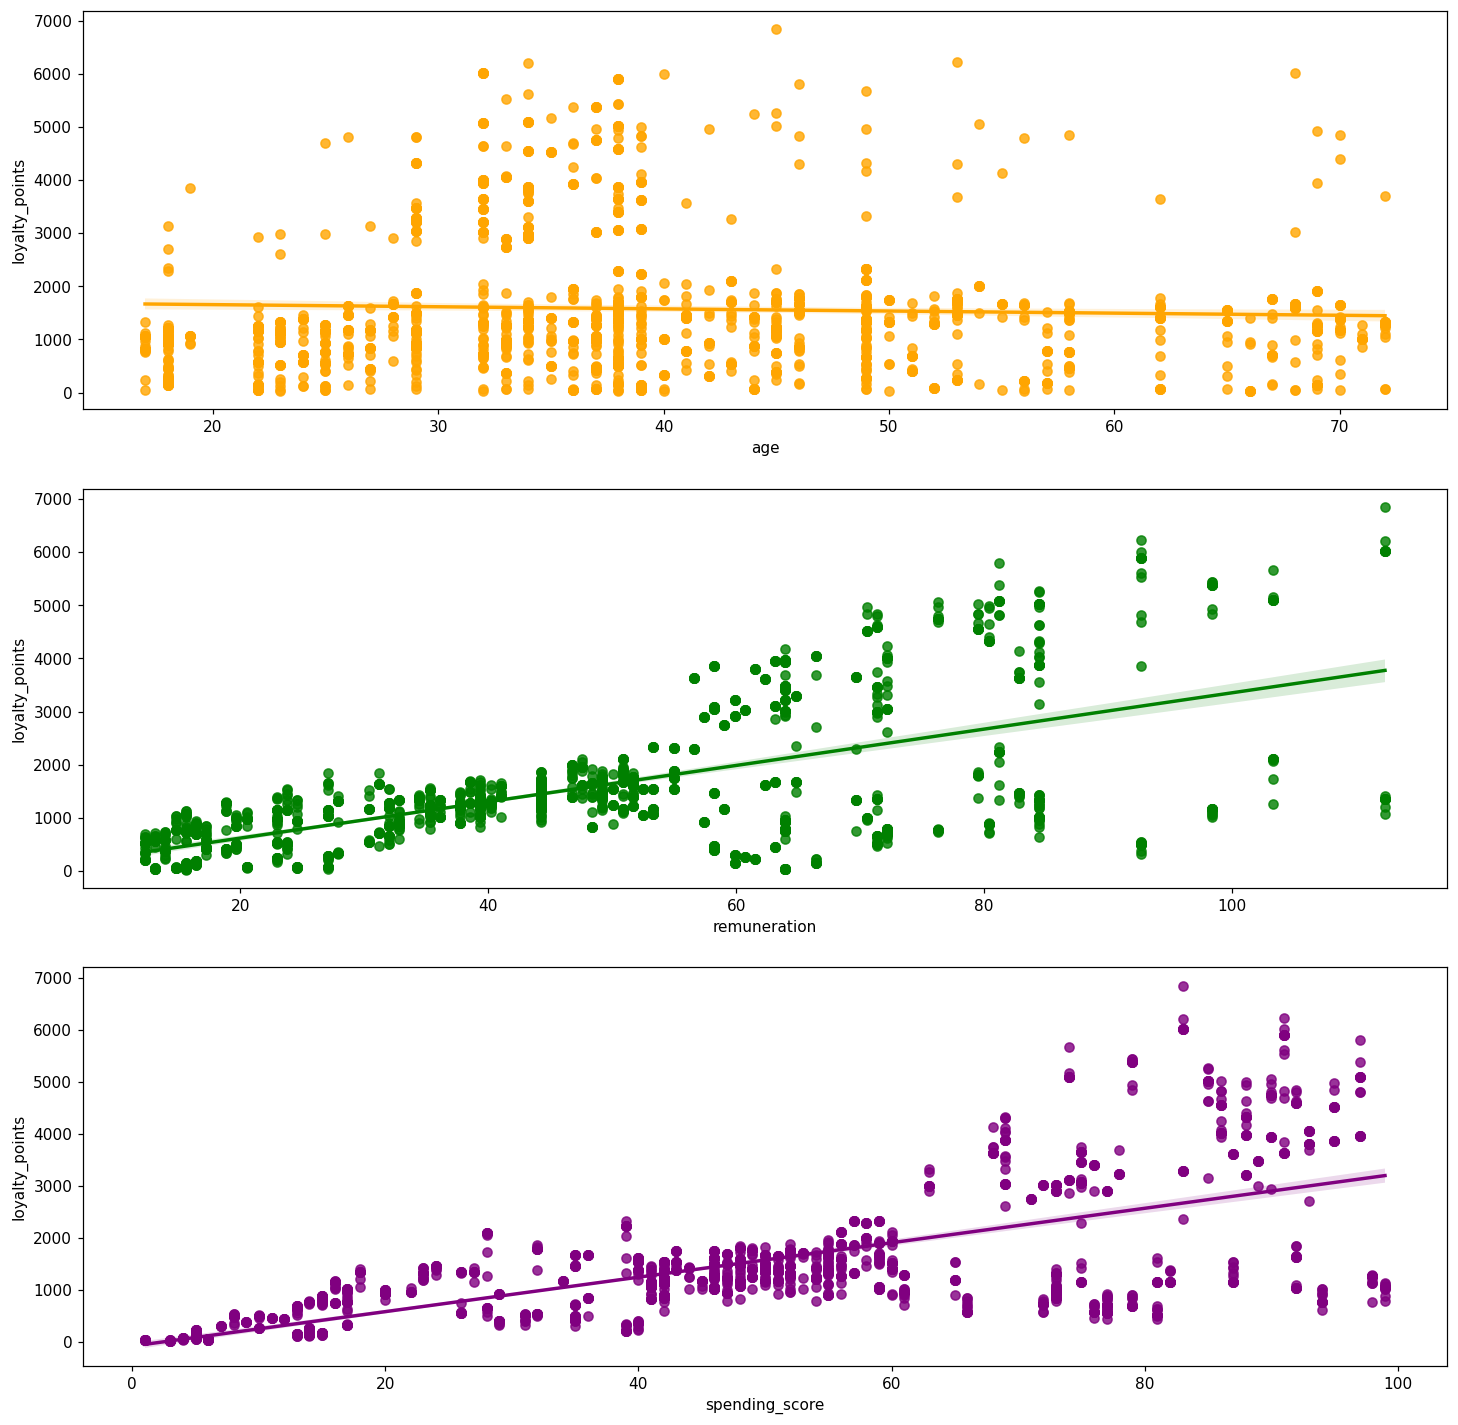

In [19]:
# Set the figure size and DPI
plt.figure(figsize=(16, 16), dpi=110)

# Scatterplot for age vs. loyalty points
plt.subplot(3, 1, 1)
plt.ylabel("loyalty points")
plt.xlabel("age")
sns.regplot(data=df, y='loyalty_points', x='age', color='orange')

# Scatterplot for remuneration vs. loyalty points
plt.subplot(3, 1, 2)
plt.ylabel("loyalty points")
plt.xlabel("remuneration")
sns.regplot(data=df, y='loyalty_points', x='remuneration', color='green')

# Scatterplot for spending score vs. loyalty points
plt.subplot(3, 1, 3)
plt.ylabel("loyalty points")
plt.xlabel("spending_score")
sns.regplot(data=df, y='loyalty_points', x='spending_score', color='purple')

# Save the figure as a PNG file
plt.savefig("loyalty_points_vs_variables.png", bbox_inches="tight")

plt.show()

### Loyalty Points

Before running the multiple linear regression using OLS, the distribution of "loyalty_points" was checked with histograms and Q-Q plots to assess normality. This assumption mainly applies to the dependent variable, not the independent ones (age, remuneration, and spending scores).

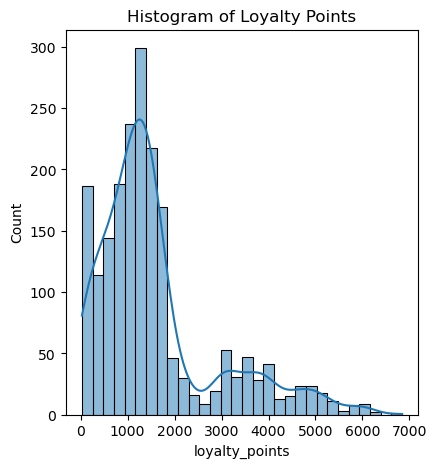

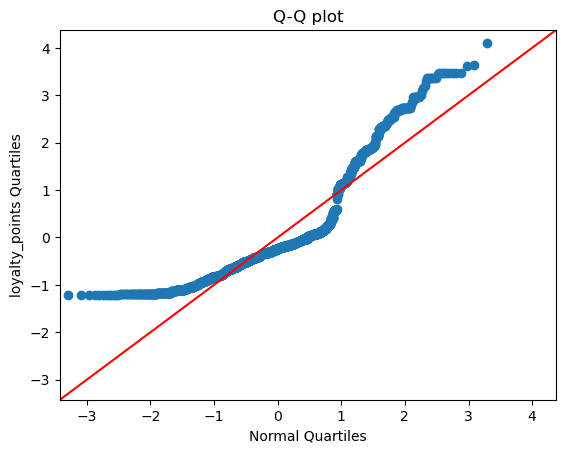

ShapiroResult(statistic=0.8430727369718951, pvalue=1.2431393983403577e-40)


In [20]:
# Draw histogram of the dependant variable loyalty_points
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='loyalty_points', bins=30, kde=True)
plt.title("Histogram of Loyalty Points")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['loyalty_points'], fit=True, line='45')
plt.ylabel("loyalty_points Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['loyalty_points']))

The histogram of loyalty_points shows a strong skew and lack of symmetry, indicating it does not follow a normal distribution. The Q-Q plot further confirms this, as the data points deviate noticeably from the 45° line. Additionally, the Shapiro–Wilk test yields a p-value below 0.05, suggesting a significant departure from normality. Given this, data transformation or alternative regression methods that are more robust to non-normality should be considered.

### Log-transformed Loyalty Points

In [21]:
# Log-transform loyalty points
df['log_loyalty_points'] = np.log(df['loyalty_points'])

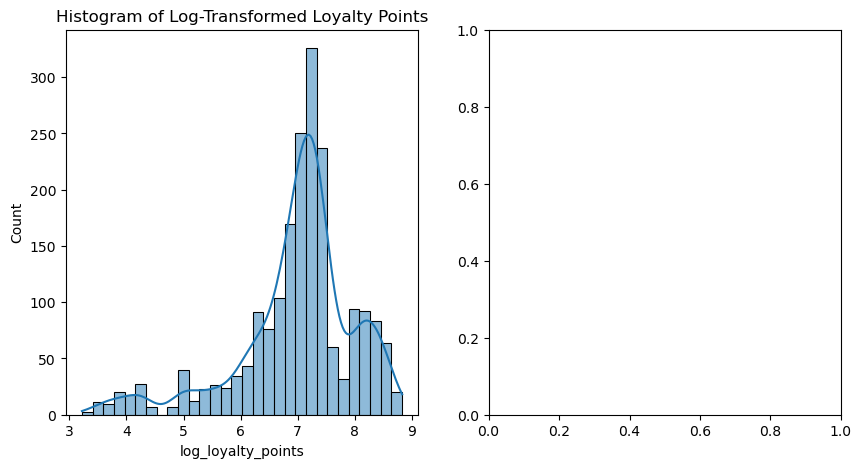

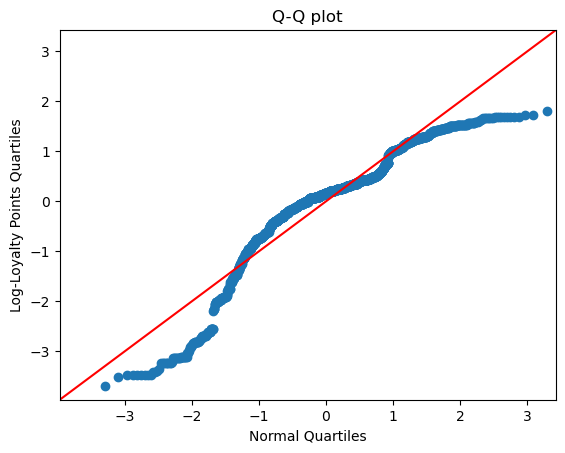

Shapiro-Wilk Test:
Test Statistic: 0.9045411555916092
p-value: 1.2331497598614564e-33


In [22]:
# Draw histogram of the log-transformed 'loyalty_points'
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1, 2, 1)
sns.histplot(df, x='log_loyalty_points', bins=30, kde=True)
plt.title("Histogram of Log-Transformed Loyalty Points")

# Plot the log-transformed 'loyalty_points' versus the quartiles of the N(0,1)
plt.subplot(1, 2, 2)
sm.qqplot(df['log_loyalty_points'], fit=True, line='45')
plt.ylabel("Log-Loyalty Points Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

# Perform the Shapiro-Wilk test on the log-transformed 'loyalty_points'
shapiro_result = shapiro(df['log_loyalty_points'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_result.statistic)
print("p-value:", shapiro_result.pvalue)

The Shapiro–Wilk test assesses normality using the W statistic, where values near 1 indicate a normal distribution. A p-value below 0.05 suggests the data significantly deviates from normality.
After applying a log transformation to loyalty_points, the histogram and Q-Q plot show a more symmetric, near-normal pattern. However, the test’s very small p-value (≈ 1.23e-33) still indicates deviation, likely due to the test’s sensitivity to large sample sizes.

### Box-Con Transformation of Loyalty Points

In [23]:
# Step 1: Apply the Box-Cox transformation
df['loyalty_points_boxcox'], lambda_bestfit = stats.boxcox(df['loyalty_points'])

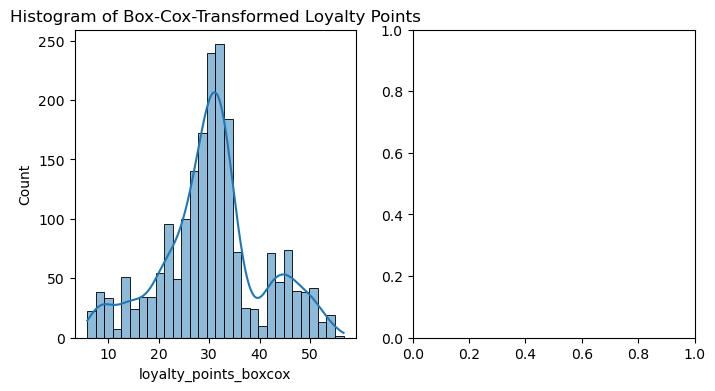

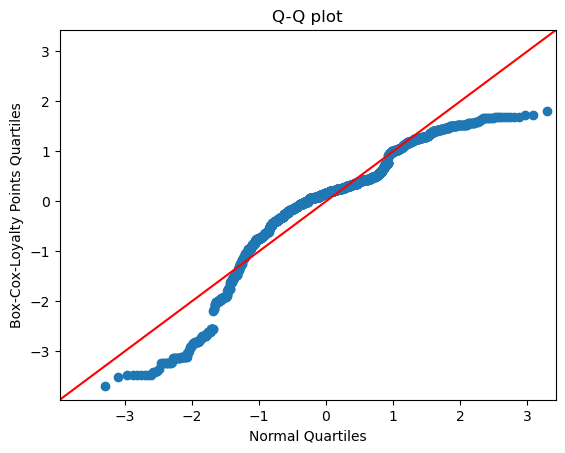

Shapiro-Wilk Test:
Test Statistic: 0.9719001084213502
p-value: 2.345607130936576e-19


In [24]:
# Draw histogram of the Box-Cox-transformed 'loyalty_points'
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1, 2, 1)
sns.histplot(df, x='loyalty_points_boxcox', bins=30, kde=True)
plt.title("Histogram of Box-Cox-Transformed Loyalty Points")

# Plot the Box-Cox-transformed 'loyalty_points' versus the quartiles of the N(0,1)
plt.subplot(1, 2, 2)
sm.qqplot(df['log_loyalty_points'], fit=True, line='45')
plt.ylabel("Box-Cox-Loyalty Points Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

# Perform the Shapiro-Wilk test on the Box-Cox-transformed 'loyalty_points'
shapiro_result = shapiro(df['loyalty_points_boxcox'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_result.statistic)
print("p-value:", shapiro_result.pvalue)

### Age

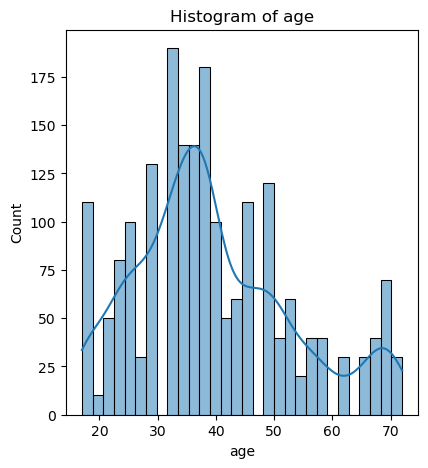

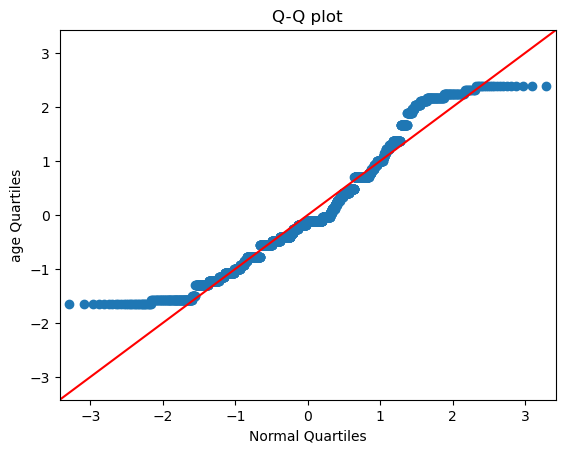

ShapiroResult(statistic=0.952421138780556, pvalue=5.3944884902236335e-25)


In [25]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='age', bins=30, kde=True)
plt.title("Histogram of age")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['age'], fit=True, line='45')
plt.ylabel("age Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['age']))

### Remuneration

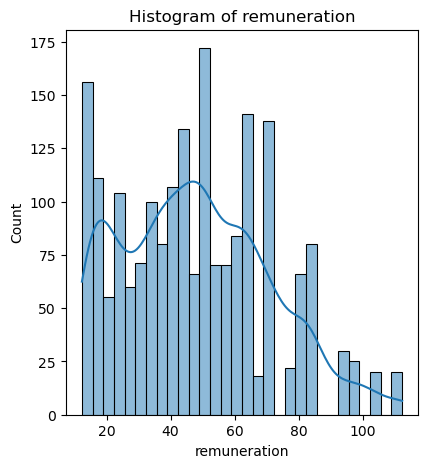

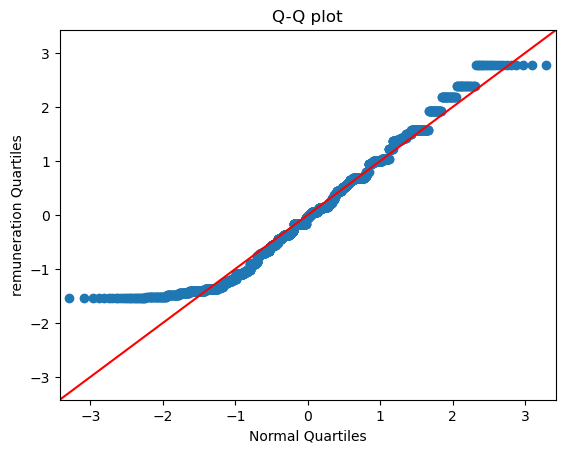

ShapiroResult(statistic=0.9676769125360404, pvalue=8.839614210894001e-21)


In [26]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='remuneration', bins=30, kde=True)
plt.title("Histogram of remuneration")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['remuneration'], fit=True, line='45')
plt.ylabel("remuneration Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['remuneration']))

### Spending Score

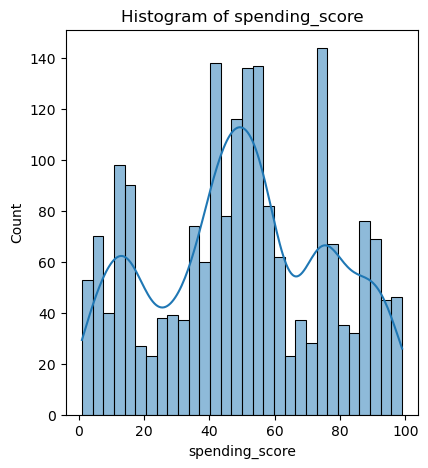

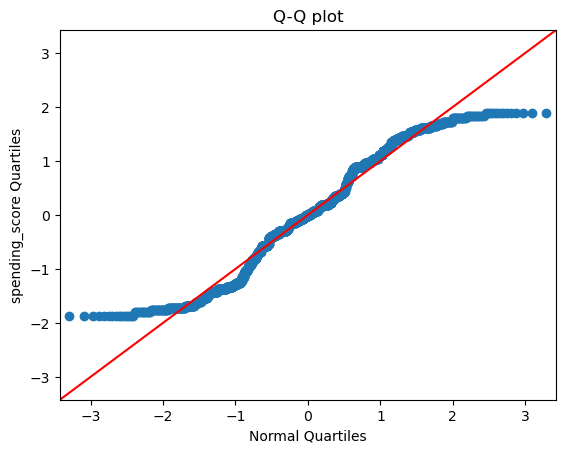

ShapiroResult(statistic=0.9683451815858953, pvalue=1.4532331711072837e-20)


In [27]:
# Draw histogram of dependant variable loyalty_points
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1,2,1)
sns.histplot(df, x='spending_score', bins=30, kde=True)
plt.title("Histogram of spending_score")

# Plot the loyalty_points versus the quartiles of the N(0,1)
# The fit=True argument first Standardises loyalty_points before plotting them

#plt.subplot(1,2,2)
sm.qqplot(df['spending_score'], fit=True, line='45')
plt.ylabel("spending_score Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(df['spending_score']))

## Multiple Linear regression

Evaluate the assumptions of linearity, independence of errors, and homoscedasticity prior to selecting a multiple linear regression model with OLS.

### Using Original Loyalty Points Data

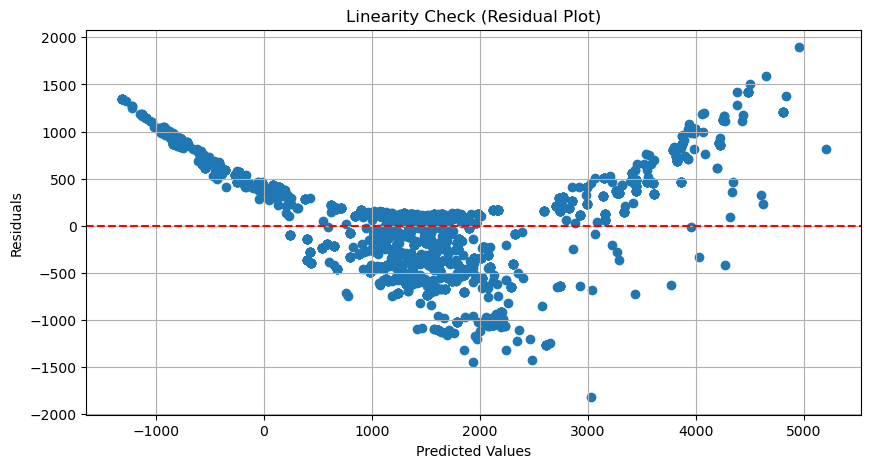

In [28]:
# Step 1: Fit the multiple linear regression model
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['loyalty_points']  # Dependent variable
model = sm.OLS(y, X).fit()

# Step 2: Linearity
# Check linearity by plotting the observed values against the predicted values (residual plot)
predicted = model.predict(X)
residuals = y - predicted
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residual Plot)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [29]:
# Step 3: Independence of Errors
# Check independence of errors using a Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)
# If the statistic is around 2 (close to 2), it suggests independence of errors.

Durbin-Watson Statistic: 3.4534017787867333


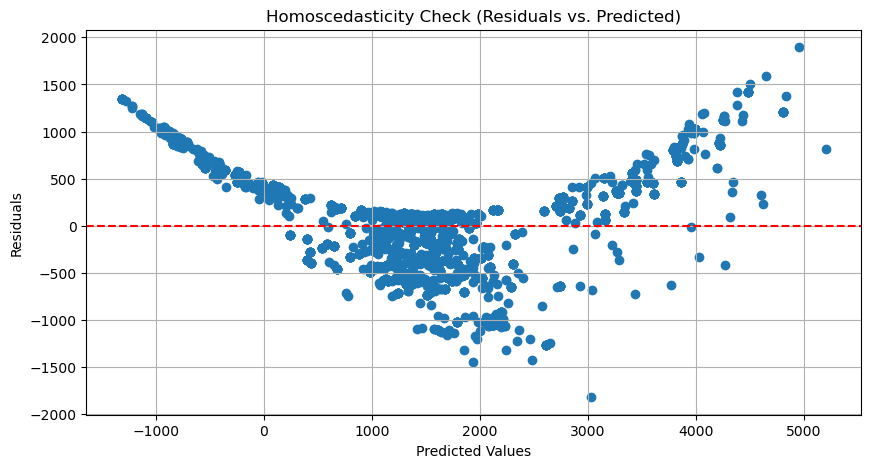

In [30]:
# Step 4: Homoscedasticity
# Check for homoscedasticity using a scatterplot of residuals against the predicted values
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Residuals vs. Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [31]:
# Step 5: Additional Diagnostics
# You can also calculate VIF (Variance Inflation Factor) to check for multicollinearity.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

# Step 6: Run the multiple linear regression model using OLS
results = model.summary()
print(results)

VIF:
         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014
                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:17:19   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|  

Diagnostics show that key regression assumptions are not met with the original loyalty_points data. Refer to the log-transformed results below for details.

### Using Log-transformed Loyalty Points Data

In [32]:
# Step 1: Fit the multiple linear regression model
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['log_loyalty_points']  # Log-transformed dependent variable
model = sm.OLS(y, X).fit()

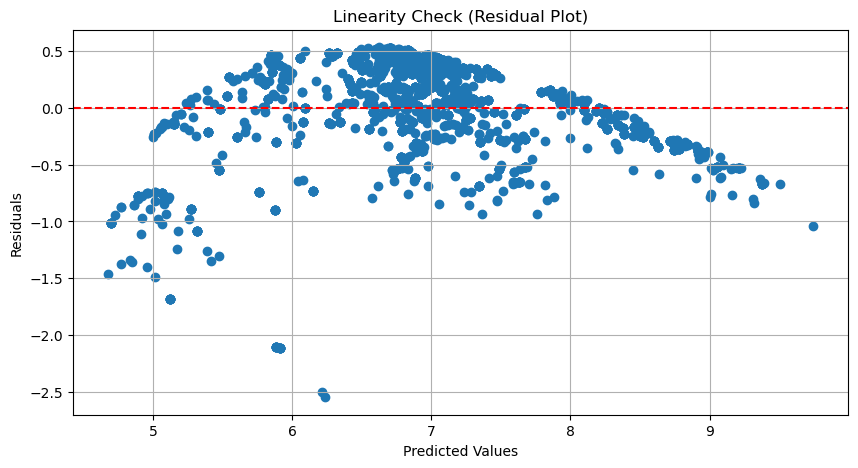

In [33]:
# Step 2: Linearity Check
predicted = model.predict(X)
residuals = y - predicted
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residual Plot)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [34]:
# Step 3: Independence of Errors
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.2195530464653461


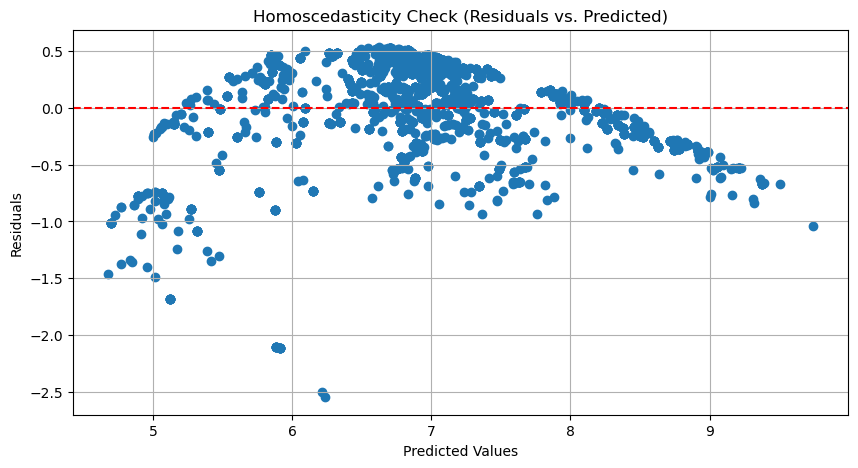

In [35]:
# Step 4: Homoscedasticity Check
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Residuals vs. Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [36]:
# Step 5: Additional Diagnostics (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif) 

VIF:
         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014


In [37]:
# Step 6: Run the multiple linear regression model using OLS
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:     log_loyalty_points   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:17:21   Log-Likelihood:                -1182.5
No. Observations:                2000   AIC:                             2373.
Df Residuals:                    1996   BIC:                             2395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9913      0.045     89.

Linearity Check: The residual plot shows a curved or dome-shaped pattern, suggesting a possible violation of the linearity assumption and indicating a potential non-linear relationship between the independent variables and the log-transformed loyalty_points.


Independence of Errors: The Durbin–Watson statistic of approximately 1.22 indicates minimal autocorrelation in the residuals, meaning the independence of errors assumption is likely satisfied.


Homoscedasticity Check: The residuals vs. predicted values plot also shows a curved pattern, suggesting a potential breach of the homoscedasticity assumption, as the residual spread appears to vary with predicted values.


Variance Inflation Factor (VIF): The VIF values for age, remuneration, and spending_score are all near 1, indicating little to no multicollinearity among the predictors. Although the intercept (“const”) shows a higher VIF, this is generally not a concern.


#### Insights:


The model explains approximately 81.6% of the variation in the log-transformed loyalty_points (R² = 0.816). The F-statistic is highly significant (p ≈ 0.00), indicating that the overall model is statistically meaningful.

All independent variables have statistically significant coefficients (p-values close to 0), suggesting that each contributes meaningfully to the model. The Durbin–Watson statistic is close to 2, indicating minimal autocorrelation in the residuals.

However, diagnostic plots reveal potential violations of linearity and homoscedasticity, as shown by the dome-shaped residual patterns. Multicollinearity is not a concern, given the low VIF values.

Overall, the model demonstrates strong explanatory power and statistical significance. To further address the non-linearity and heteroscedasticity issues, a Box–Cox transformation was applied and evaluated in the following section.

## Using Box-Cox Transformation

In [38]:
# Step 1: Apply the Box-Cox transformation
df['loyalty_points_boxcox'], lambda_bestfit = stats.boxcox(df['loyalty_points'])

In [39]:
# Step 2: Fit the multiple linear regression model with the transformed data
X = df[['age', 'remuneration', 'spending_score']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['loyalty_points_boxcox']  # Transformed dependent variable
model = sm.OLS(y, X).fit()

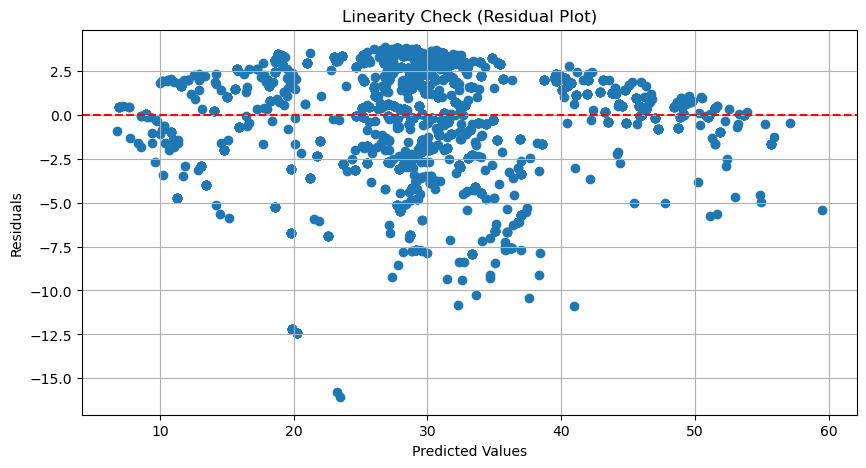

In [40]:
# Step 3: Linearity Check
predicted = model.predict(X)
residuals = y - predicted
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residual Plot)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [41]:
# Step 4: Independence of Errors
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.7288852509234867


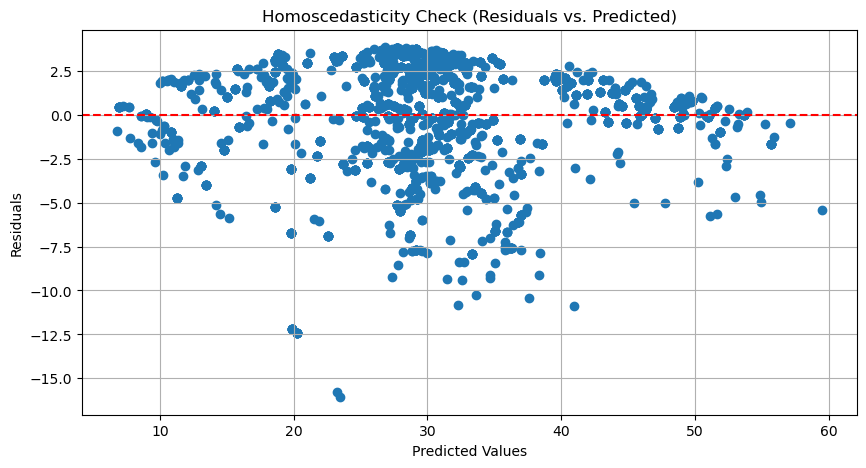

In [42]:
# Step 5: Homoscedasticity Check
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Residuals vs. Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [43]:
# Step 6: Additional Diagnostics (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

VIF:
         Features        VIF
0           const  20.769030
1             age   1.053015
2    remuneration   1.000052
3  spending_score   1.053014


In [44]:
# Step 7: Run the multiple linear regression model using OLS
results = model.summary()
print(results)

                              OLS Regression Results                             
Dep. Variable:     loyalty_points_boxcox   R-squared:                       0.903
Model:                               OLS   Adj. R-squared:                  0.903
Method:                    Least Squares   F-statistic:                     6194.
Date:                   Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                           13:17:24   Log-Likelihood:                -5108.1
No. Observations:                   2000   AIC:                         1.022e+04
Df Residuals:                       1996   BIC:                         1.025e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

#### Model Evaluation:


Linearity Check: The residual plot shows only a slight dome shape, with most points clustered near the zero residual line. This indicates a clear improvement in linearity compared to the previous transformation, suggesting that the relationship between the Box–Cox transformed loyalty_points and the independent variables is approximately linear.


Durbin–Watson Statistic: With a value of approximately 1.729, the Durbin–Watson test indicates minimal autocorrelation, confirming that the independence of errors assumption is met.


Homoscedasticity Check: The Residuals vs. Predicted plot displays a mild dome shape, with data points closely centered around zero. Although there is still a slight variation in residual spread, this represents an improvement in homoscedasticity relative to earlier models.


Variance Inflation Factor (VIF): VIF values for age, remuneration, and spending_score are close to 1, indicating negligible multicollinearity. The higher VIF for the intercept (“const”) is not a concern.



#### Insights:

The model explains about 90.3% of the variability in the Box–Cox transformed loyalty_points (R² = 0.903). The F-statistic is highly significant (p ≈ 0.00), and all independent variables have statistically significant coefficients (p-values near 0).


Overall, the Box–Cox transformed model shows substantial improvement in linearity and homoscedasticity, satisfies the independence of errors assumption, and exhibits no multicollinearity. The model demonstrates strong explanatory power and overall statistical significance.


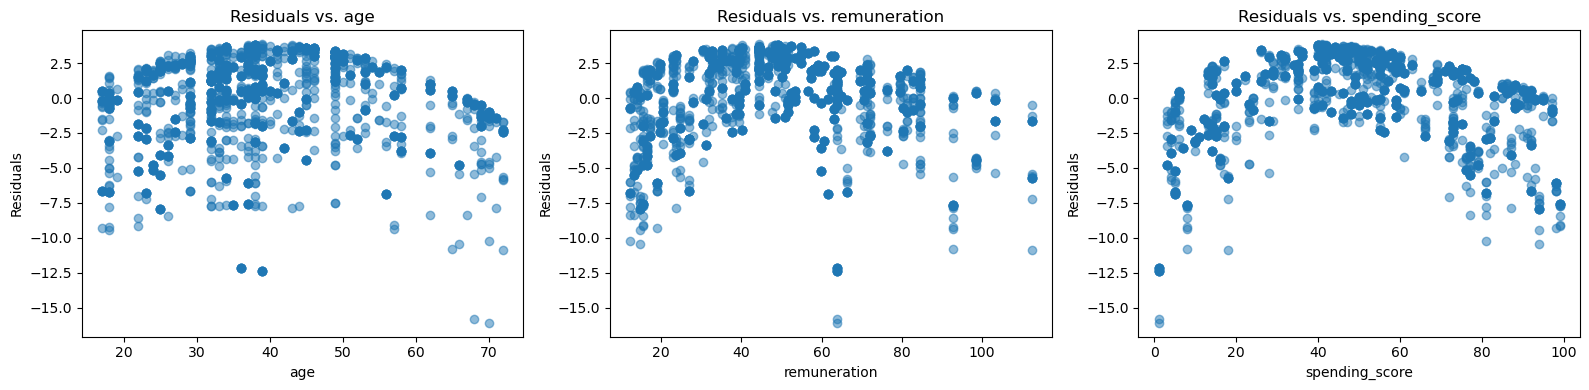

Breusch-Pagan Test for Heteroscedasticity:
P-Value: 2.6407111399452217e-05
F-Stat P-Value: 2.5147203276498063e-05


In [45]:
# Plot the residuals
residuals = model.resid

# Plot Residuals vs. Independent Variables
fig, axes = plt.subplots(1, len(model.params) - 1, figsize=(16, 4))
for i, predictor in enumerate(model.params.index[1:]):  # Exclude the intercept
    axes[i].scatter(df[predictor], residuals, alpha=0.5)
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {predictor}")

plt.tight_layout()
plt.show()

# Perform Breusch-Pagan Test for Heteroscedasticity
_, p_value, _, f_p_value = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test for Heteroscedasticity:")
print(f"P-Value: {p_value}")
print(f"F-Stat P-Value: {f_p_value}")

#### The test’s p-value (≈ 2.64e-05) is very close to zero, providing strong evidence against the null hypothesis of homoscedasticity. This indicates the presence of heteroscedasticity in the model. Similarly, the F-statistic p-value (≈ 2.51e-05) supports this conclusion, reinforcing the evidence of non-constant residual variance.


#### Overall, the Breusch–Pagan results confirm that heteroscedasticity is present, meaning the residual variance changes with different levels of the independent variables. This can affect the reliability of coefficient estimates and statistical inferences. Although addressing this issue is beyond the scope of this project, potential remedies include applying robust standard errors or transforming the data to stabilize the residual variance.

### (Prior to developing the Multiple Linear Regression Model, individual Simple Linear Regressions were conducted for each independent variable against loyalty_points)

## Linear Regression

### Spending vs Loyalty

In [46]:
# Independent variable.
x = df['spending_score']

# Dependent variable.
y = df['loyalty_points']

# OLS model and summary.
points1 = ols('y ~ x', data = df).fit()

# Print the regression table.
points1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        13:17:27   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The independent variable spending explains approximately 45% of the variation in loyalty_points. The p-value (≈ 2.92e-263) is well below 0.05, indicating strong statistical significance. For every 1-unit increase in spending, loyalty_points are expected to increase by about 33.06 units. The intercept is not statistically significant and can therefore be disregarded.

In [47]:
# Extract the estimated parameters.
print("Parameters: ", points1.params)

# Extract the standard errors.
print("Standard errors: ", points1.bse)

# Extract the predicted values.
print("Predicted values: ", points1.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [48]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * df['spending_score']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

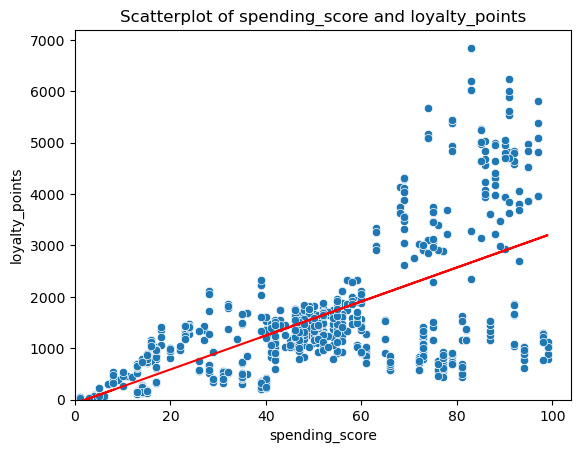

In [49]:
# Plot the graph with a regression line.
sns.scatterplot(data=df, x='spending_score', y='loyalty_points')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title("Scatterplot of spending_score and loyalty_points")
plt.show()


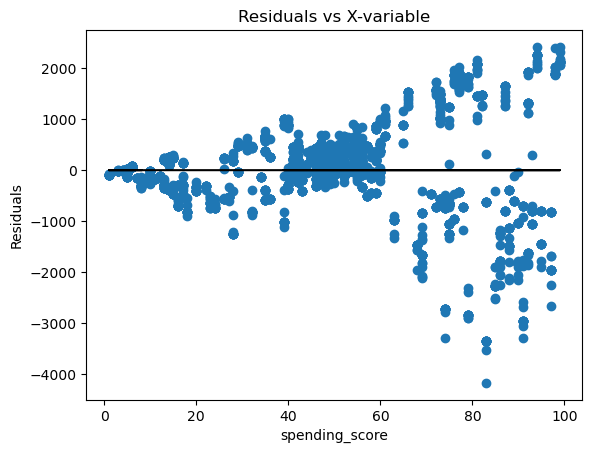

In [50]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.


plt.scatter(x, points1.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("spending_score")
plt.ylabel("Residuals")
plt.show()

### Renumeration vs Loyalty

In [51]:
# Independent variable.
x = df['remuneration']

# Dependent variable.
y = df['loyalty_points']

# OLS model and summary.
points1 = ols('y ~ x', data = df).fit()

# Print the regression table.
points1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.43e-209
Time:                        13:17:29   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Extract the estimated parameters.
print("Parameters: ", points1.params)

# Extract the standard errors.
print("Standard errors: ", points1.bse)

# Extract the predicted values.
print("Predicted values: ", points1.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [53]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * df['remuneration']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

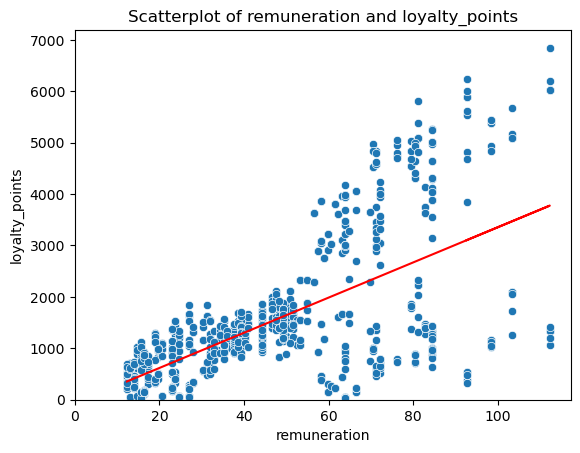

In [54]:
# Plot graph with regression line.
sns.scatterplot(data=df, x='remuneration', y='loyalty_points')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title("Scatterplot of remuneration and loyalty_points")
plt.show()

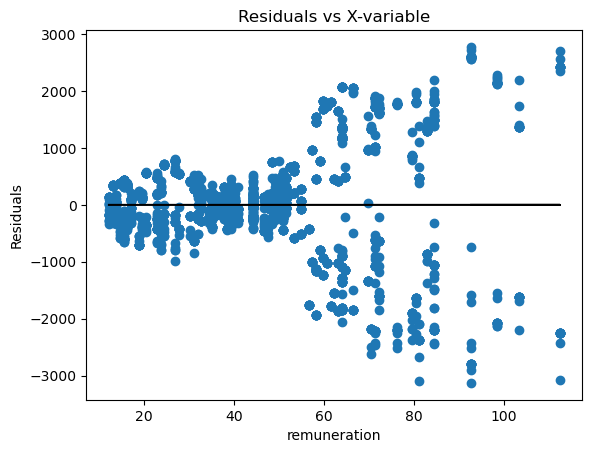

In [55]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.


plt.scatter(x, points1.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("remuneration")
plt.ylabel("Residuals")
plt.show()

### Age vs Loyalty

In [56]:
# Independent variable.
x = df['age']

# Dependent variable.
y = df['loyalty_points']

# OLS model and summary.
points1 = ols('y ~ x', data = df).fit()

# Print the regression table.
points1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 12 Oct 2025   Prob (F-statistic):             0.0577
Time:                        13:17:30   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Extract the estimated parameters.
print("Parameters: ", points1.params)

# Extract the standard errors.
print("Standard errors: ", points1.bse)

# Extract the predicted values.
print("Predicted values: ", points1.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [58]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + -4.012805 * df['age']

# View the output.
y_pred

0       1664.287210
1       1644.223185
2       1648.235990
3       1636.197575
4       1604.095135
           ...     
1995    1588.043915
1996    1563.967085
1997    1600.082330
1998    1600.082330
1999    1608.107940
Name: age, Length: 2000, dtype: float64

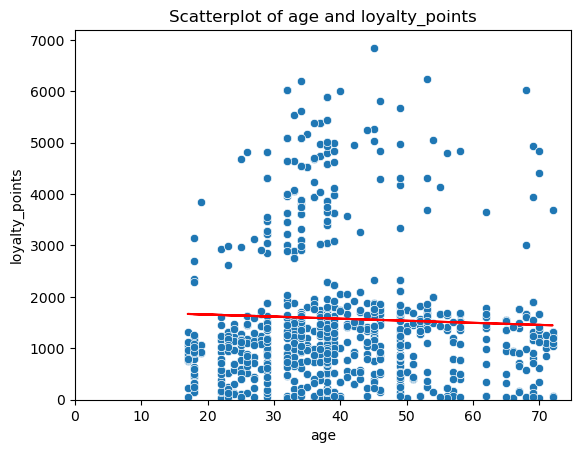

In [59]:
# Plot graph with regression line.
sns.scatterplot(data=df, x='age', y='loyalty_points')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title("Scatterplot of age and loyalty_points")
plt.show()

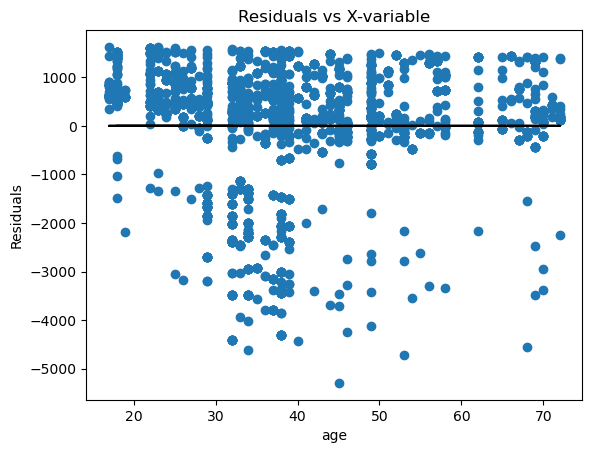

In [60]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.


plt.scatter(x, points1.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("age")
plt.ylabel("Residuals")
plt.show()

### Insights

#### Spending Score vs. Loyalty Points

#### Spending score is a statistically significant predictor of loyalty_points (p < 0.001). The slope of 33 indicates that loyalty points increase by roughly 33 for every 1-unit rise in spending score. The R² value is moderate, suggesting that while spending has a strong impact, other factors also influence loyalty.


#### Remuneration vs. Loyalty Points

#### Remuneration is also statistically significant (p < 0.001) with a slope of 34.19, meaning loyalty points increase by about 34 for each 1-unit increase in remuneration. The R² = 0.38 indicates a moderate fit, implying that remuneration explains some, but not all, of the variation in loyalty.


#### Age vs. Loyalty Points

#### Age is not a statistically significant predictor of loyalty (p = 0.058). The slope is nearly zero (–4.01) and the R² = 0.002, showing that age has minimal influence on loyalty compared to spending and remuneration.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## Load and prepare the data

In [61]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [62]:
# Create your new DataFrame.
df2 = pd.read_csv('reviews.csv')
df2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [63]:
# Check Education types in the data
df2['education'].unique()


array(['graduate', 'PhD', 'diploma', 'postgraduate', 'Basic'],
      dtype=object)

In [64]:
#The order of the Edu column is meaningful and the order matters, so apply LabelEncoder to this column. 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
import pandas as pd
import numpy as np

# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# Order lists of the values for the Edu column.
Edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
df2['education'] = le.transform(df2['education'])

# View the DataFrame
print(df2.head())

   gender  age  remuneration  spending_score  loyalty_points  education  \
0    Male   18         12.30              39             210          2   
1    Male   23         12.30              81             524          2   
2  Female   22         13.12               6              40          2   
3  Female   25         13.12              77             562          2   
4  Female   33         13.94              40             366          2   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen fro

In [65]:
# One-hot encode the gender column and drop the first category
df2 = pd.get_dummies(df2, columns=['gender'], drop_first=True)

In [66]:
# Specify Y.
y = df2['loyalty_points']

# Specify X.
X = df2.drop('loyalty_points', axis = 1)

In [67]:
# Review X and Y.
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

In [68]:
X.head()

age  remuneration  spending_score  education  product  \
0   18         12.30              39          2      453   
1   23         12.30              81          2      466   
2   22         13.12               6          2      254   
3   25         13.12              77          2      263   
4   33         13.94              40          2      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...         True  
1  Another worthless Dungeon Master's screen from...         True  
2                    pretty, but also pretty useless        False  
3                                         Five Stars        False  
4                                         Money trap        False

In [69]:
# Drop irrelevant text columns: 'review', 'product' and 'summary'
X = X.drop(['review', 'product','summary'], axis=1)

In [70]:
X.head()

age  remuneration  spending_score  education  gender_Male
0   18         12.30              39          2         True
1   23         12.30              81          2         True
2   22         13.12               6          2        False
3   25         13.12              77          2        False
4   33         13.94              40          2        False

## Create train and test data sets.

In [71]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42
)


## Create Decision tree regressor

In [72]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

In [73]:
# Fit the regressor object to the data set.
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
# Predict the response for the data test.
y_pred = regressor.predict(X_test)

import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Specify to print the MAE and MSE (to evaluate the accuracy of the model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error:  44.96357142857143
Mean Squared Error:  14545.935
Root Mean Squared Error:  120.60652967397743
R² Score: 0.9911719332710354


In [75]:
# Prune the model.

# Define values to test
max_depth_values = [3, 5, 7]
min_samples_leaf_values = [5, 10, 20]
min_samples_split_values = [10, 20, 50]

# Try each combination
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        for min_samples_split in min_samples_split_values:
            regressor = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                min_samples_split=min_samples_split,
                random_state=42
            )
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)

            # Evaluation metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = math.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, min_samples_split={min_samples_split}")
            print(f"  MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
            print("-" * 60)

max_depth=3, min_samples_leaf=5, min_samples_split=10
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=5, min_samples_split=20
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=5, min_samples_split=50
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=10, min_samples_split=10
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=10, min_samples_split=20
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=10, min_samples_split=50
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
--------------------------------

## Fit and plot final model.

In [76]:
# Fit and plot final model.
# Final model with best pruning parameters
regressor = DecisionTreeRegressor(
    max_depth=7,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

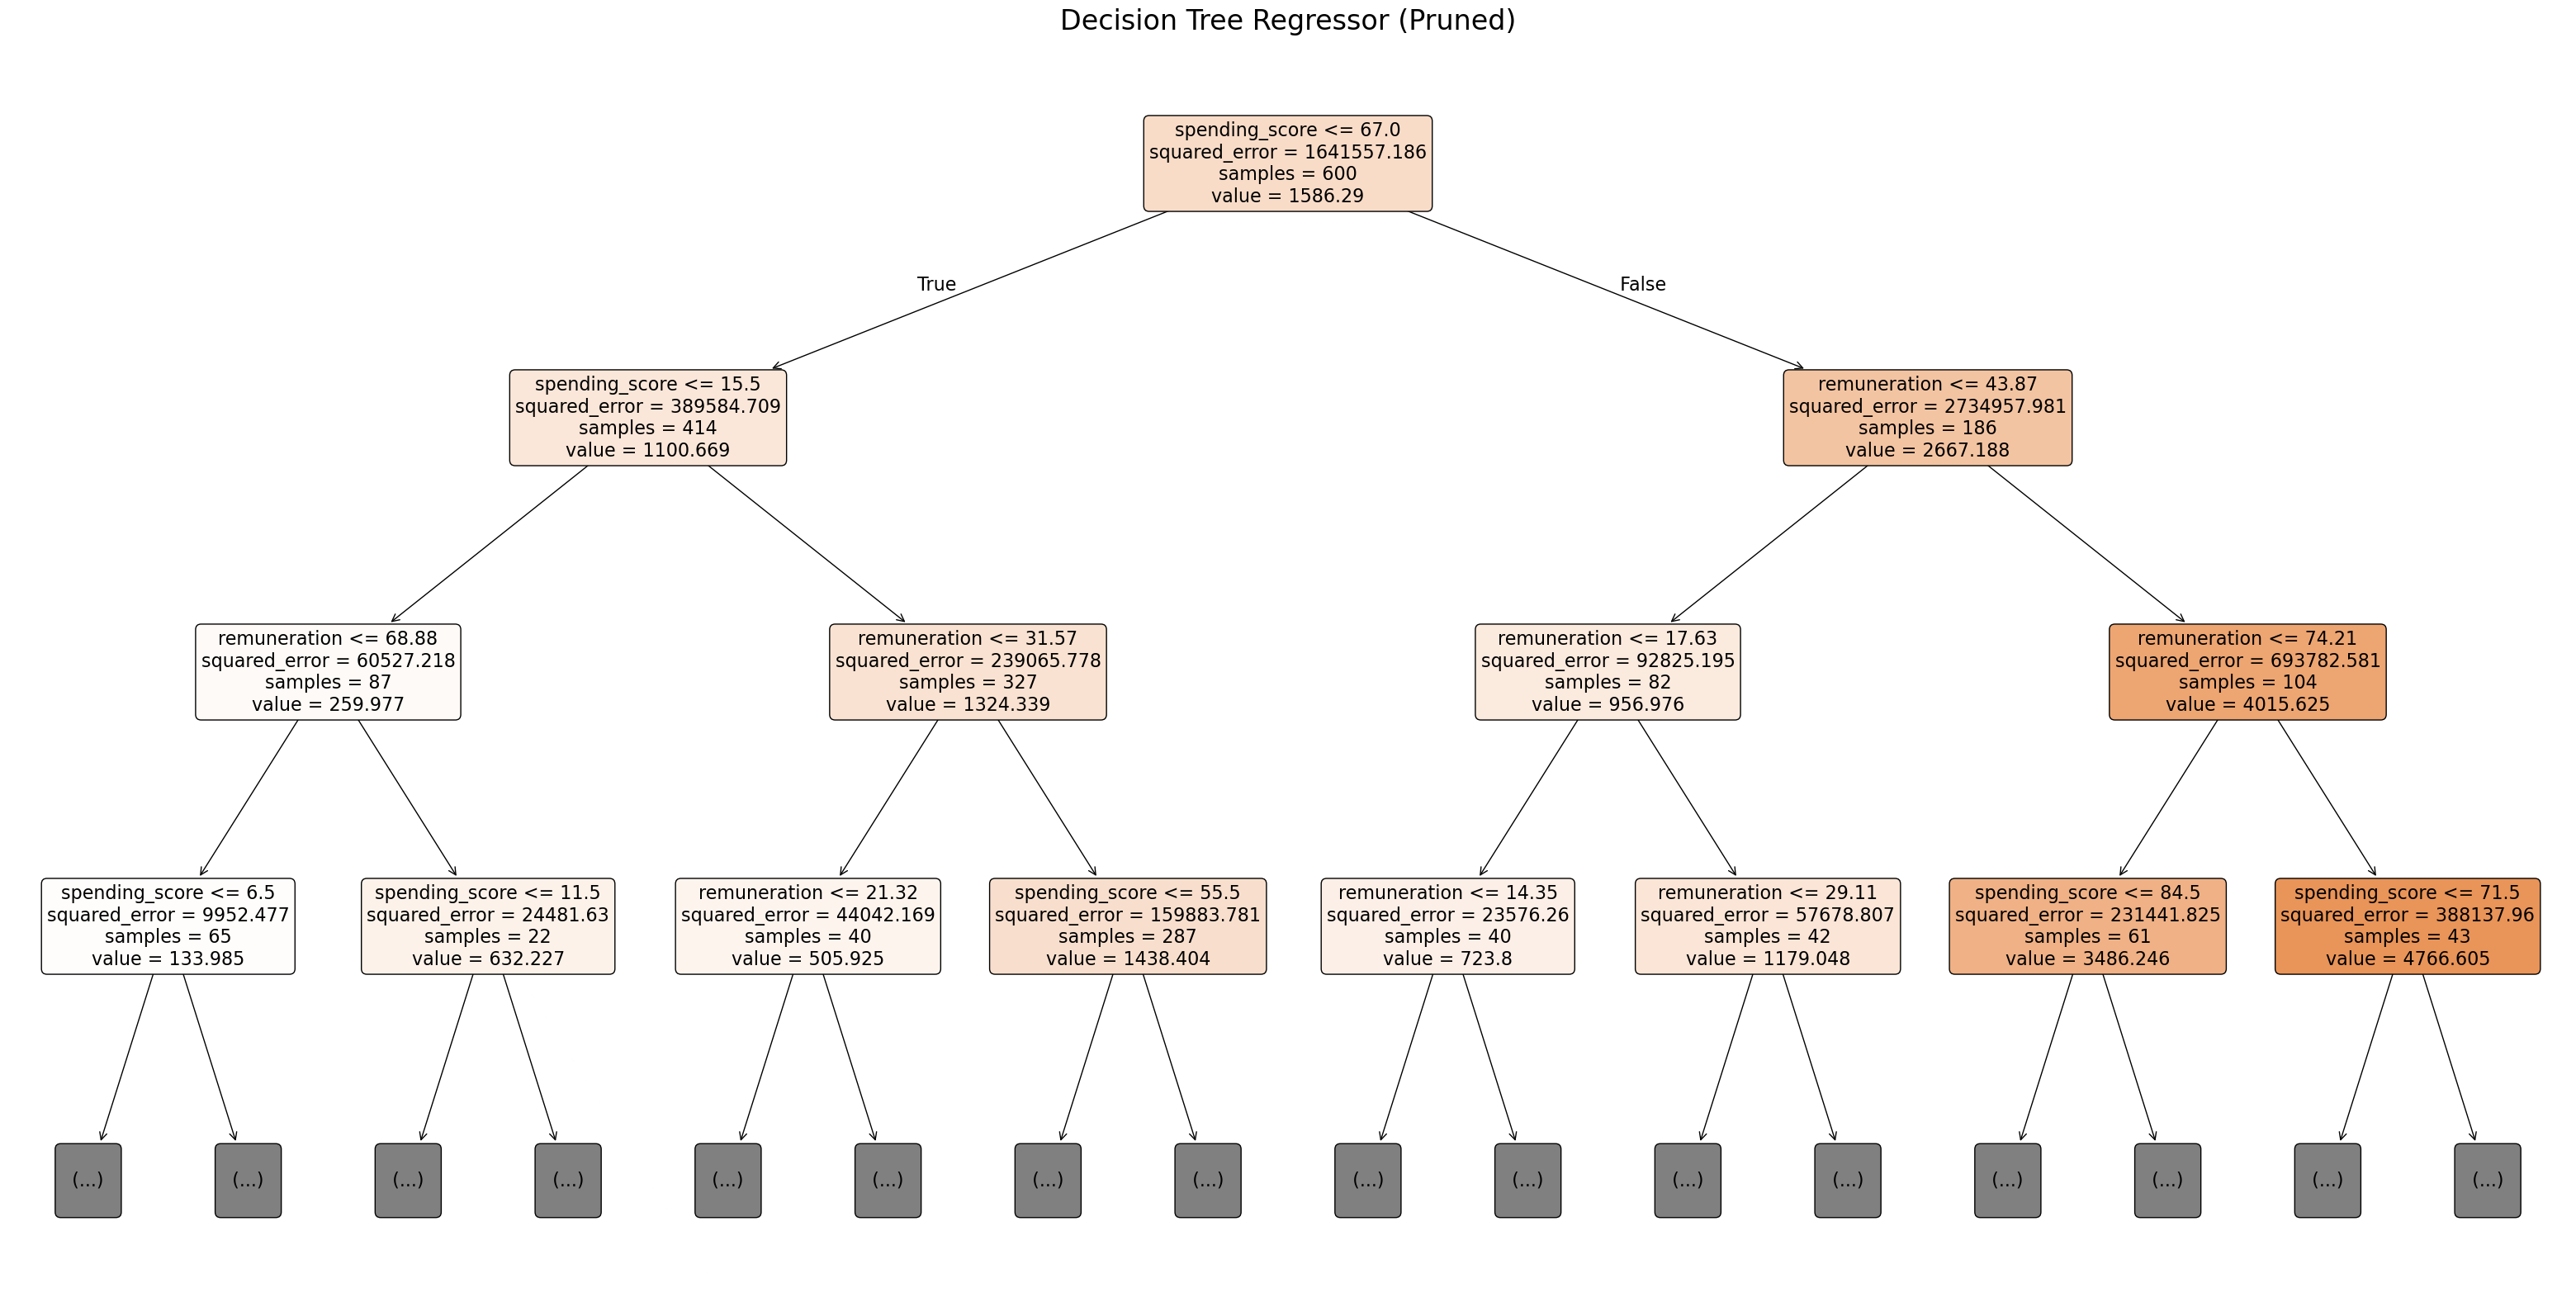

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(regressor, feature_names=X.columns, filled=True, max_depth=3, rounded=True, fontsize=16)
plt.title("Decision Tree Regressor (Pruned)",fontsize=24)
plt.show()

## Discuss:

#### Insights from the Decision Tree

The decision tree highlights spending_score and remuneration as the strongest predictors of loyalty_points, appearing early in the model splits. Higher spending and income levels are consistently linked with greater loyalty. Branches where spending_score exceeds 67 and remuneration is above 43.87 yield higher predicted loyalty values (e.g., 4015, 4766), while lower values of these variables cluster on the left branches, with predictions around 134. This pattern reinforces the positive relationship between customers’ economic activity and loyalty point accumulation.

#### Use Cases:

High-value customers: Target customers in the right-side branches with premium rewards or exclusive offers to strengthen loyalty.
Low-engagement segments: Focus retention efforts on left-branch customers using tailored incentives or entry-level rewards.


# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [78]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [79]:
# View the existing DataFrame
df


gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  log_loyalty_points  \
0     The fact that 50% of this space is wasted on a...            5.347108   
1     Another worthless Dungeon Master's screen from...            6.261492   
2                       pretty, but also pretty useless            3.688879   
3                                            Five Stars            6.331502   
4                                            Money trap            5.902633   
...                                                 ...                 ...   
1995     The perfect word game for mixed ages (with Mom            8.301770   
1996                                          Super fun            6.289716   
1997                                         Great Game            8.633019   
1998                                         Four Stars            6.954639   
1999                                     Love this game            6.171701   

      loyalty_points_boxcox  
0                 15.221535  
1                 21.861599  
2                  7.382386  
3                 22.460458  
4                 19.006629  
...                     ...  
1995              46.773285  
1996              22.101305  
1997              52.715182  
1998              28.470271  
1999              21.114162  

[2000 rows x 11 columns]

In [80]:
# Load the CSV file(s) as df2.
df2 = df[['remuneration', 'spending_score']]

# View DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [81]:
# Explore the data.
print(df2.columns)

Index(['remuneration', 'spending_score'], dtype='object')


In [82]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

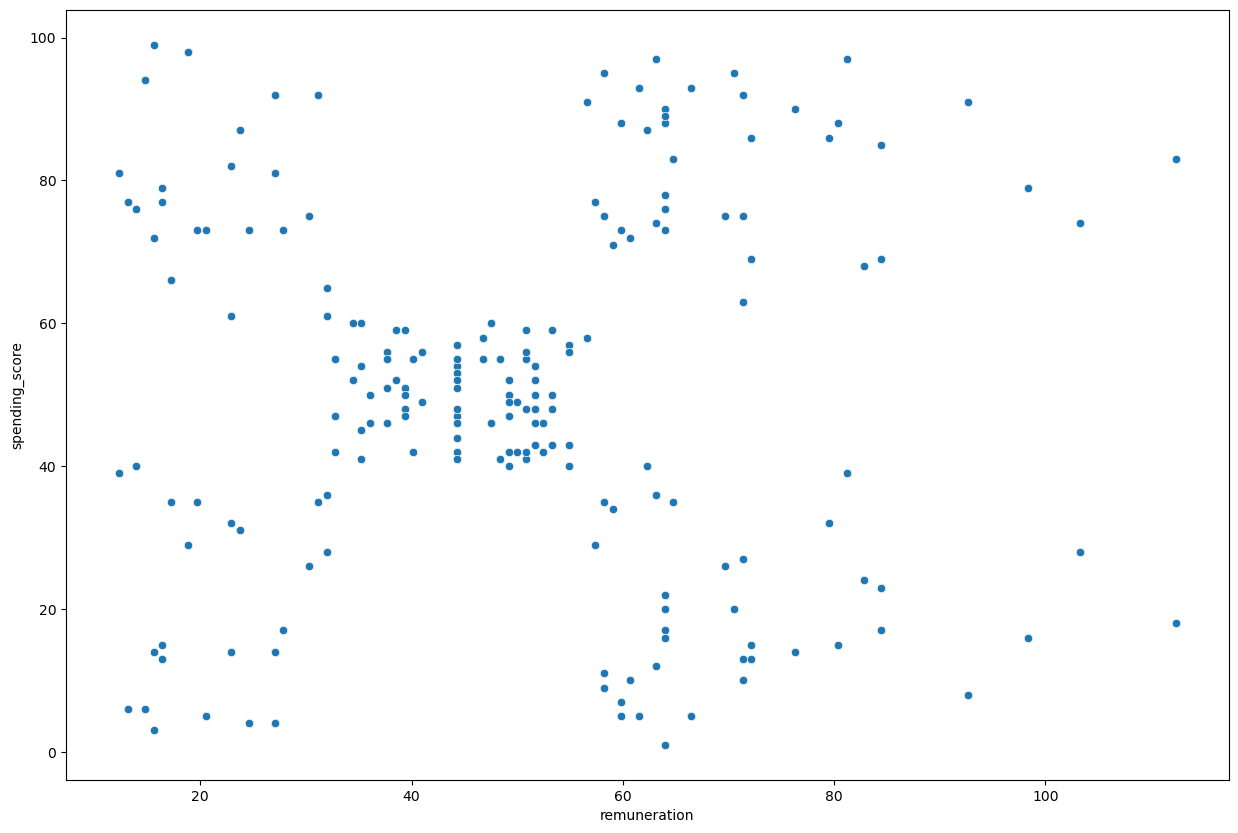

In [83]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score', 
                data=df2)

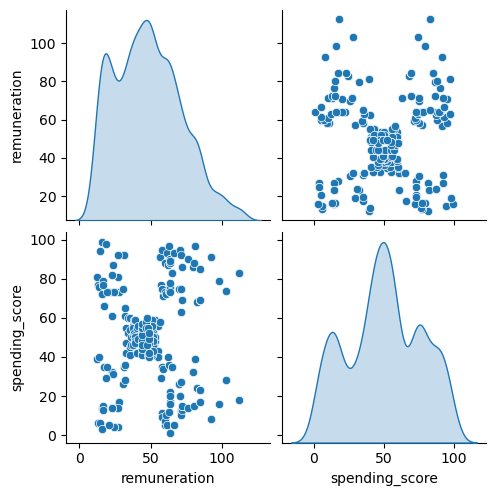

In [84]:
# Create a pairplot with Seaborn.
# Create a pairplot with Seaborn.
x = df[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

## Elbow and silhoutte methods

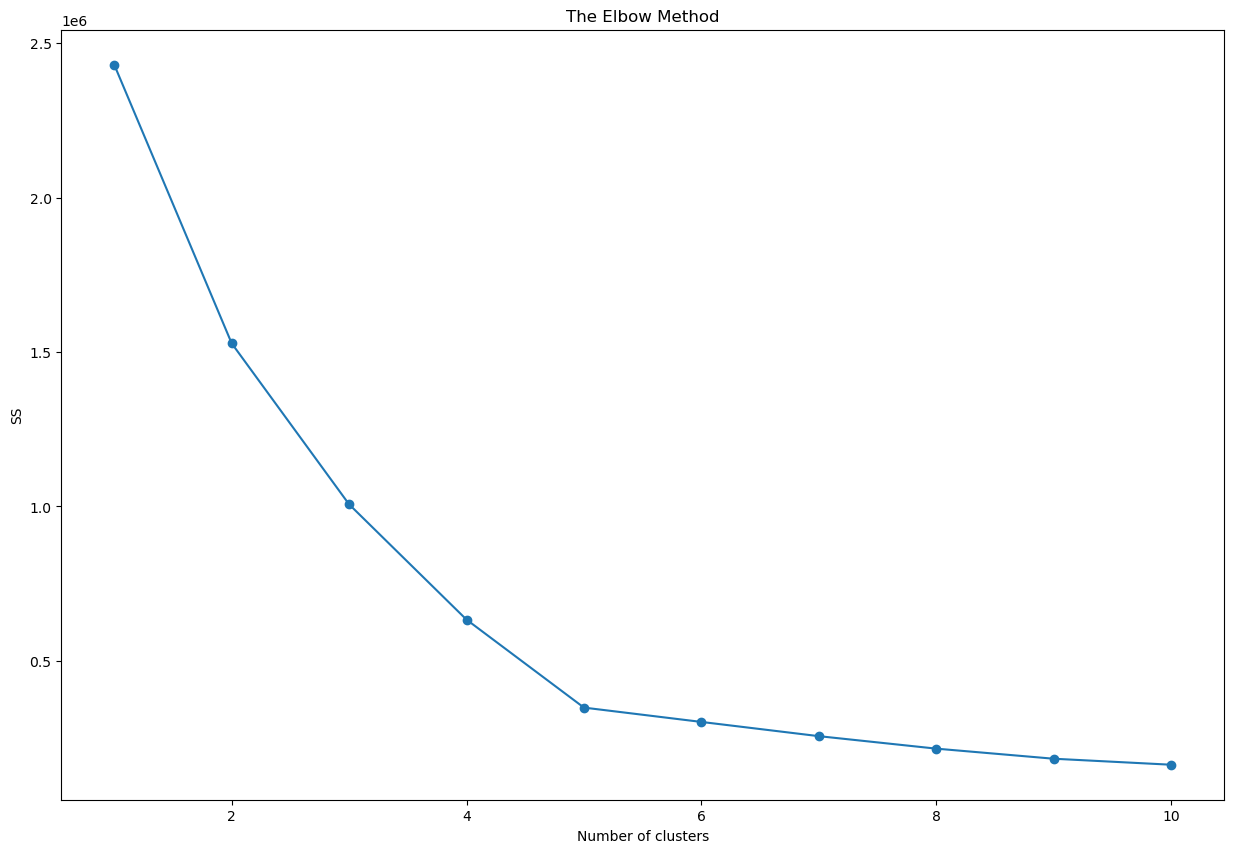

In [85]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

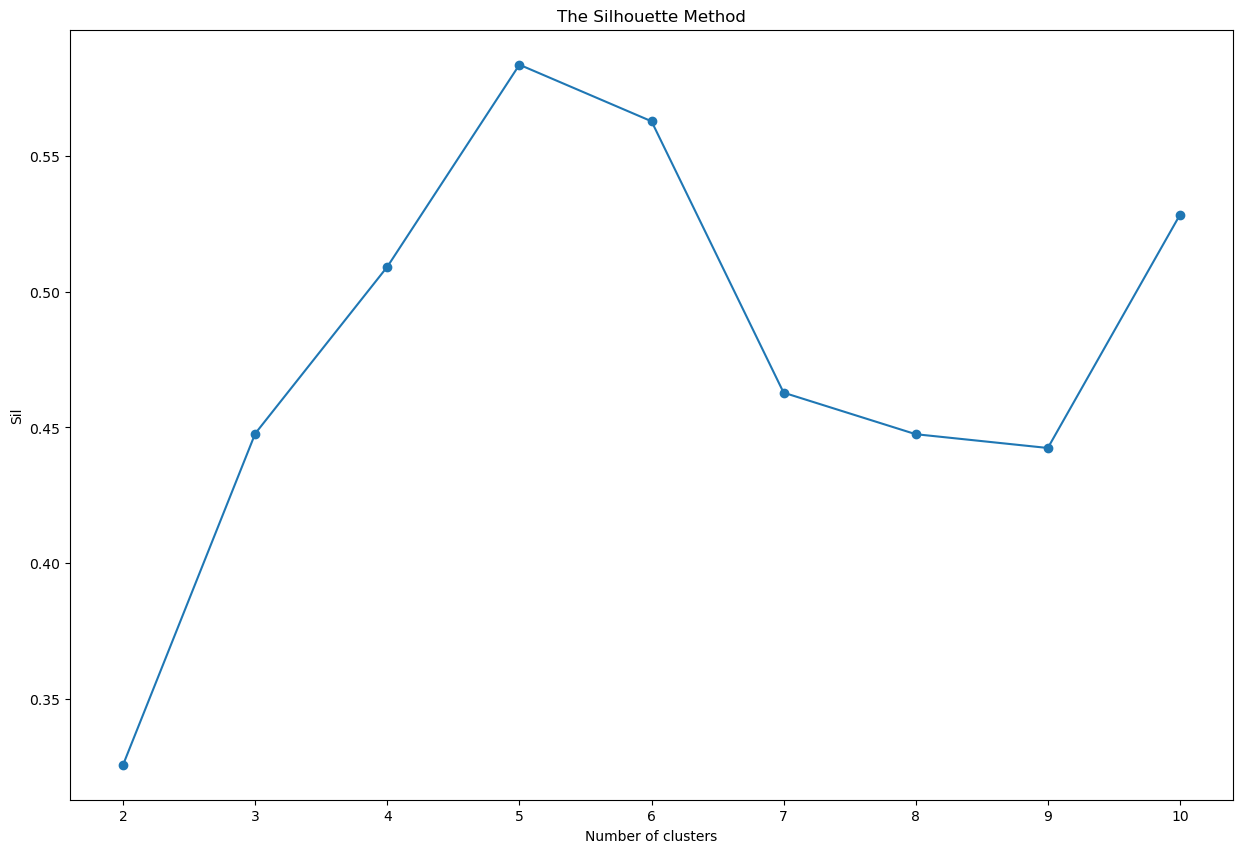

In [86]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## Evaluate k-means model at different values of *k*

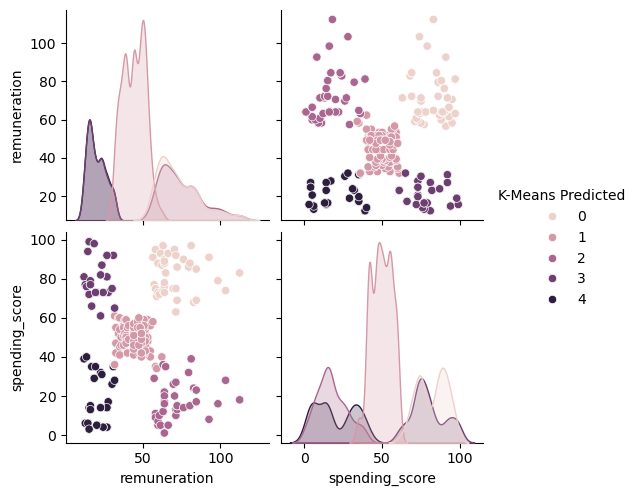

In [91]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [92]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

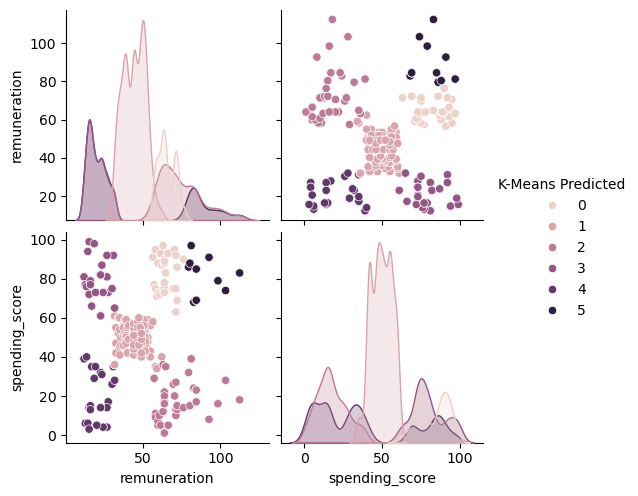

In [93]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [108]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()


K-Means Predicted
1    774
2    330
4    271
3    269
0    238
5    118
Name: count, dtype: int64

## 5. Fit final model and justify your choice

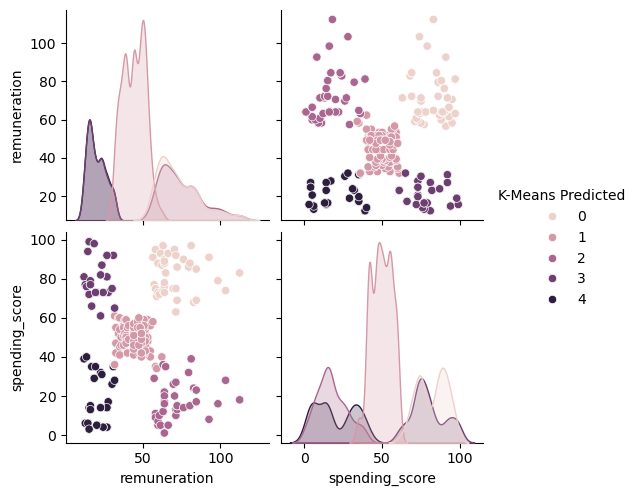

In [109]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [110]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [111]:
	
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


remuneration  spending_score  K-Means Predicted
0            12.30              39                  4
1            12.30              81                  3
2            13.12               6                  4
3            13.12              77                  3
4            13.94              40                  4
...            ...             ...                ...
1995         84.46              69                  0
1996         92.66               8                  2
1997         92.66              91                  0
1998         98.40              16                  2
1999         92.66               8                  2

[2000 rows x 3 columns]

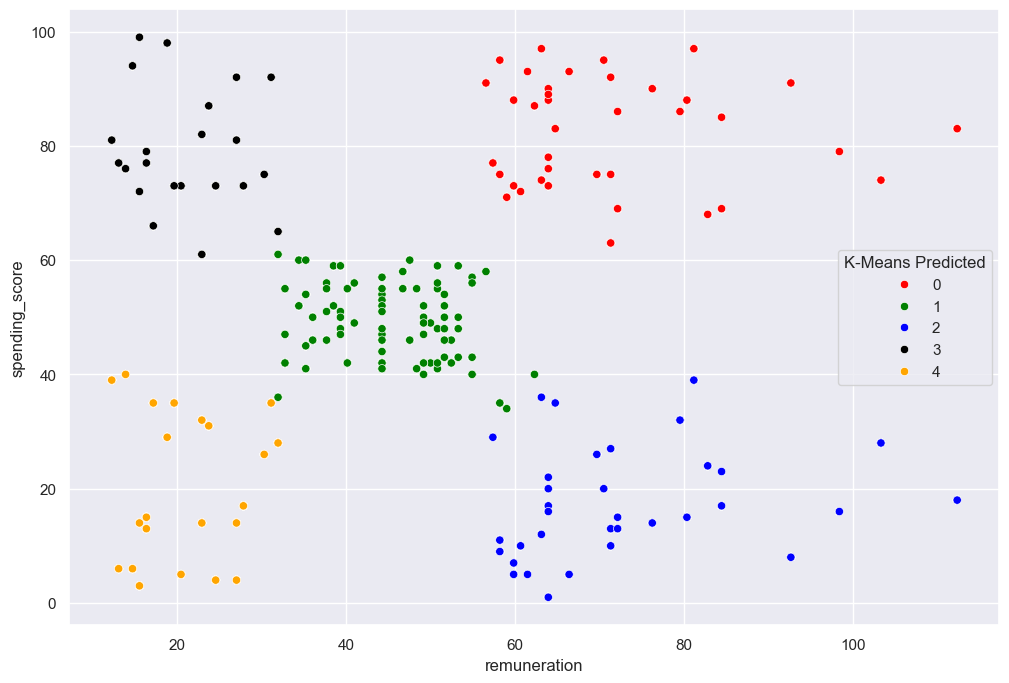

In [112]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
x

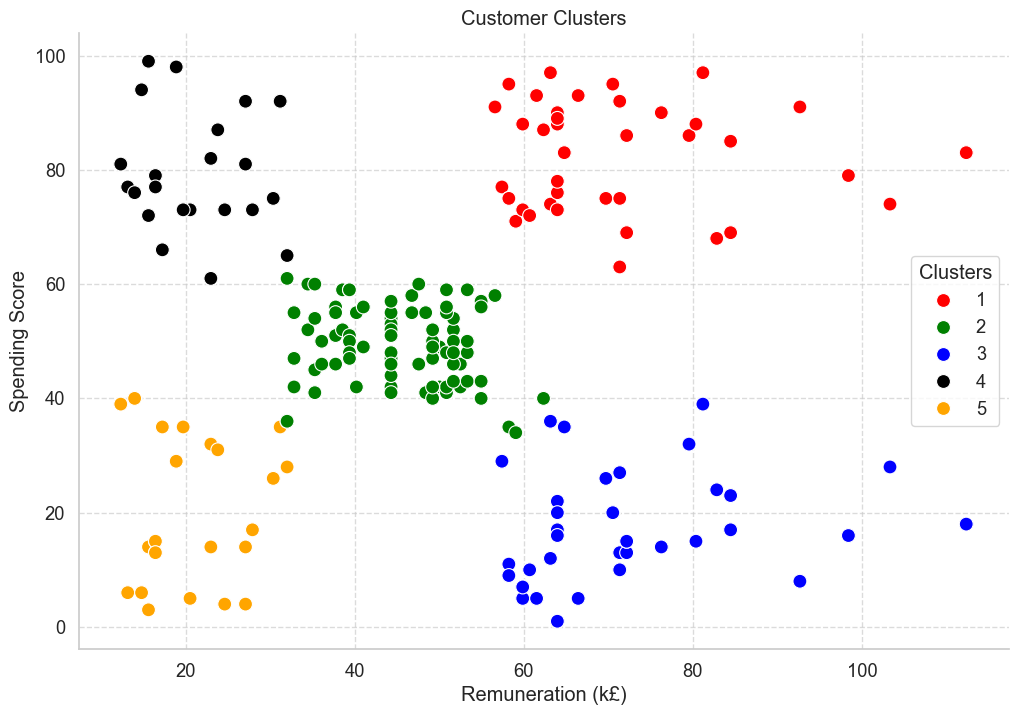

In [113]:
# Set a larger figure size and style for better presentation

# Increment cluster labels by 1
x['K-Means Predicted'] = x['K-Means Predicted'] + 1

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=1.2)

# Define a custom color palette for your clusters
custom_palette = ['red', 'green', 'blue', 'black', 'orange']

# Create the scatterplot with improved aesthetics
scatterplot = sns.scatterplot(x='remuneration',
                              y='spending_score',
                              data=x,
                              hue='K-Means Predicted',
                              palette=custom_palette,
                              s=100)  # Increase the size of data points

# Set labels for axes and a title
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')

# Customize legend position and title
plt.legend(title='Clusters', loc='center right')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Save the figure as a PNG file
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight') 

# Display the plot
plt.show()

## Discuss:

#### Clustering Insights (k = 5)


The distribution of predicted values across clusters suggests that k = 5 provides a better fit than k = 6, showing clear separation between data points. The elbow point—where the rate of decrease in SSD slows—appears most distinct at k = 5, confirming this choice. Additionally, k = 5 yields the highest silhouette score, indicating an optimal balance between cluster cohesion (similarity within clusters) and separation (difference between clusters). This configuration maximizes within-cluster similarity while minimizing overlap between groups, resulting in a more interpretable and accurate clustering solution.


#### Business Implications:

Customers can be segmented into five distinct groups, such as low earner–low spender, high earner–low spender, and low earner–high spender.
Low earner–high spender: Target with deals, vouchers, or discounts to reinforce loyalty.
Low spenders: Limited marketing investment recommended, as returns are minimal.
High earner–low spender: Prioritize marketing efforts to encourage higher spending.


# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [116]:
!pip install wordcloud

In [118]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 18.5 MB/s eta 0:00:00


In [119]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [120]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download('words')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

stop_words = set(stopwords.words('english'))

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/chanalvarez/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [121]:
# Load the data set as df3.
df3 = df

# View DataFrame.
df3


gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  log_loyalty_points  \
0     The fact that 50% of this space is wasted on a...            5.347108   
1     Another worthless Dungeon Master's screen from...            6.261492   
2                       pretty, but also pretty useless            3.688879   
3                                            Five Stars            6.331502   
4                                            Money trap            5.902633   
...                                                 ...                 ...   
1995     The perfect word game for mixed ages (with Mom            8.301770   
1996                                          Super fun            6.289716   
1997                                         Great Game            8.633019   
1998                                         Four Stars            6.954639   
1999                                     Love this game            6.171701   

      loyalty_points_boxcox  
0                 15.221535  
1                 21.861599  
2                  7.382386  
3                 22.460458  
4                 19.006629  
...                     ...  
1995              46.773285  
1996              22.101305  
1997              52.715182  
1998              28.470271  
1999              21.114162  

[2000 rows x 11 columns]

In [122]:
# Explore data set.
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 2000 non-null   object 
 1   age                    2000 non-null   int64  
 2   remuneration           2000 non-null   float64
 3   spending_score         2000 non-null   int64  
 4   loyalty_points         2000 non-null   int64  
 5   education              2000 non-null   object 
 6   product                2000 non-null   int64  
 7   review                 2000 non-null   object 
 8   summary                2000 non-null   object 
 9   log_loyalty_points     2000 non-null   float64
 10  loyalty_points_boxcox  2000 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 172.0+ KB


In [123]:
# Keep necessary columns. Drop unnecessary columns.
df3_filtered = df3[['review', 'summary']]

# View DataFrame.
df3_filtered

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [124]:
# Determine if there are any missing values.
missing_values = df3_filtered.isnull()

# Check if there are any missing values in the entire DataFrame
if missing_values.any().any():
    print("There are missing values in df3_filtered.")
else:
    print("There are no missing values in df3_filtered.")


There are no missing values in df3_filtered.


## Prepare the data for NLP
### [Change to lower case and join the elements in each of the columns respectively (review and summary)]

In [125]:
# Review: Change all to lower case and join with a space.
df3_filtered['review'] = df3_filtered['review'].str.lower()


In [126]:
# Summary: Change all to lower case and join with a space.
df3_filtered['summary'] = df3_filtered['summary'].str.lower()

### [Replace punctuation in each of the columns respectively (review and summary)]

In [127]:
import string

In [128]:
# Replace all the punctuations in review column.
df3_filtered['review'] = df3_filtered['review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# View output.
df3_filtered['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9\n\nyour unpainted...
2       nice art nice printing  why two panels are fil...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game  did not think i would like it when...
1997            great game for all\nkeeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [129]:
# Replace all the puncuations in summary column.
df3_filtered['summary'] = df3_filtered['summary'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# View output.
df3_filtered['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### [Drop duplicates in both columns]

In [130]:
# Drop duplicates in both columns.
df3_filtered.drop_duplicates(subset=['review', 'summary'], inplace=True)

# View DataFrame.
df3_filtered

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

## Tokenise and create wordclouds

In [131]:
# Create new DataFrame (copy DataFrame).
df_copy = df3_filtered.copy()

# View DataFrame.
df_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

In [132]:
# Apply tokenisation to both columns.
df_copy['review_tokens'] = df_copy['review'].apply(lambda x: word_tokenize(x))
df_copy['summary_tokens'] = df_copy['summary'].apply(lambda x: word_tokenize(x))

# View DataFrame.
df_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, w...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                        [fun, game]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1995  [the, perfect, word, game, for, mixed, ages, w...  
1996                                       [super, fun]  
1997                                      [great, game]  
1998                                      [four, stars]  
1999                                 [love, this, game]  

[1961 rows x 4 columns]

In [133]:
# Create and plot word cloud images
def plot_word_cloud(column_name):
    # Flatten the list of lists of tokenized words and join them into a single string
    text = ' '.join(' '.join(tokens) for tokens in column_name)
    
    # Create and plot the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

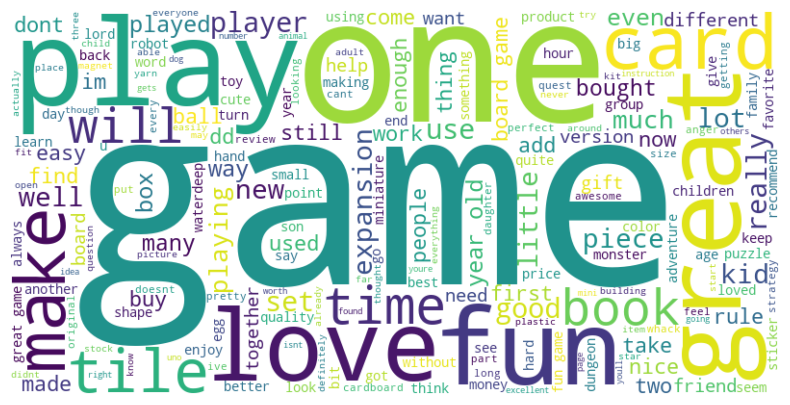

In [134]:
# Review: Plot the WordCloud image.
plot_word_cloud(df_copy['review_tokens'])

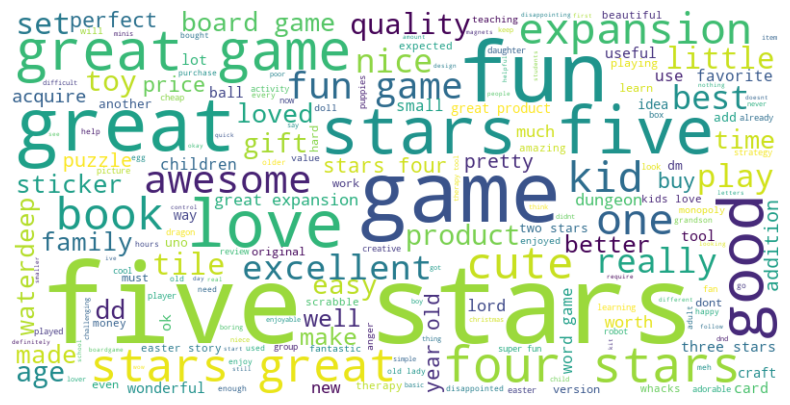

In [135]:
# Summary: Plot the WordCloud image.
plot_word_cloud(df_copy['summary_tokens'])

## Frequency distribution and polarity
### [Create frequency distribution]

In [136]:
# Determine Frequency Distribution for 'review_tokens'
all_review_words = [word for tokens in df_copy['review_tokens'] for word in tokens]
fdist_review = FreqDist(all_review_words)

In [137]:
# Display Frequency Distribution for 'review_tokens'
print("\nFrequency Distribution for 'review_tokens':")
print(fdist_review.most_common(15))  # Print the 15 most common words


Frequency Distribution for 'review_tokens':
[('the', 5451), ('and', 3233), ('to', 3162), ('a', 3160), ('of', 2488), ('i', 2090), ('it', 2083), ('is', 1782), ('this', 1776), ('game', 1671), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]


In [138]:
# Determine Frequency Distribution for 'summary_tokens'
all_summary_words = [word for tokens in df_copy['summary_tokens'] for word in tokens]
fdist_summary = FreqDist(all_summary_words)

In [139]:
# Display Frequency Distribution for 'summary_tokens'
print("\nFrequency Distribution for 'summary_tokens':")
print(fdist_summary.most_common(15))  # Print the 15 most common words


Frequency Distribution for 'summary_tokens':
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('the', 261), ('a', 240), ('for', 232), ('fun', 218), ('to', 192), ('and', 168), ('it', 150), ('of', 139), ('this', 135), ('is', 103), ('love', 93)]


### 4b) Remove alphanumeric characters and stopwords

In [140]:
# Function to preprocess text: remove punctuation and stopwords
def preprocess_text(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens


In [141]:
# Apply preprocessing to 'review_tokens' and 'summary_tokens'
df_copy['review_tokens'] = df_copy['review_tokens'].apply(preprocess_text)
df_copy['summary_tokens'] = df_copy['summary_tokens'].apply(preprocess_text)

In [142]:
# View DataFrame with cleaned tokens
print("DataFrame with Cleaned Tokens:")
print(df_copy[['review_tokens', 'summary_tokens']])

DataFrame with Cleaned Tokens:
                                          review_tokens  \
0     [comes, dms, screen, space, screen, absolute, ...   
1     [open, letter, unpainted, miniatures, bad, spe...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, previous, screens, completely, unnece...   
...                                                 ...   
1995  [perfect, word, game, mixed, ages, mom, perhap...   
1996  [great, game, think, would, like, first, recei...   
1997                 [great, game, keeps, mind, nimble]   
1998                                        [fun, game]   
1999  [game, fun, lot, like, scrabble, without, litt...   

                                         summary_tokens  
0     [fact, space, wasted, art, terribly, informati...  
1        [another, worthless, dungeon, masters, screen]  
2                       [pretty, also, pretty, useless]  
3                           

### 4c) Create wordcloud without stopwords

In [143]:
# Create and plot word cloud images
def plot_word_cloud(column_name):
    # Flatten the list of lists of cleaned tokens and join them into a single string
    text = ' '.join(' '.join(tokens) for tokens in column_name)
    
    # Create and plot the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


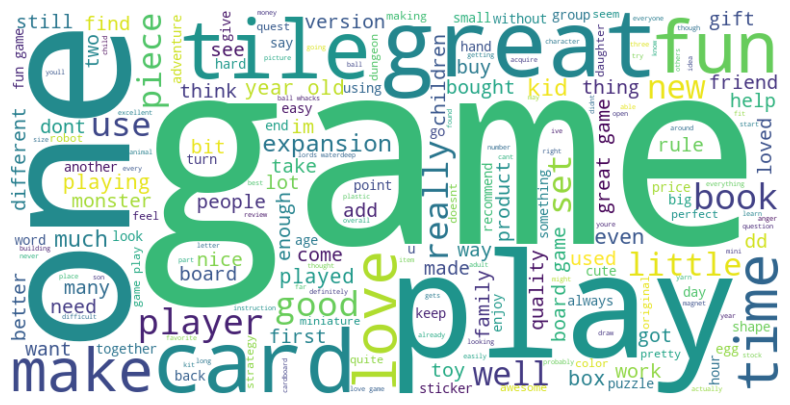

In [144]:
# Review: Plot the WordCloud image.
plot_word_cloud(df_copy['review_tokens'])

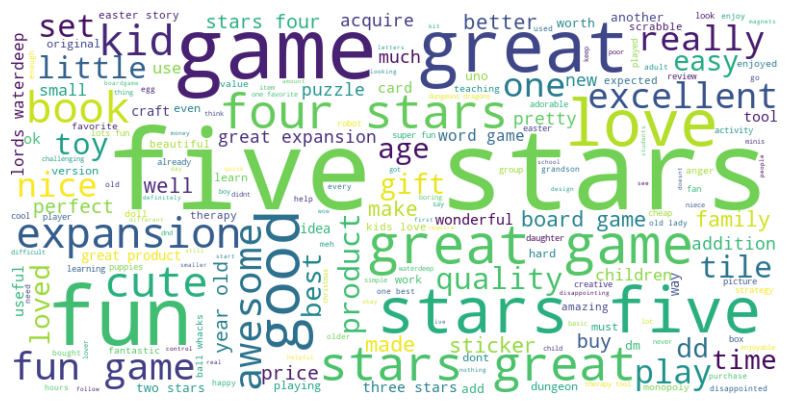

In [145]:
# Summary: Plot the WordCloud image.
plot_word_cloud(df_copy['summary_tokens'])

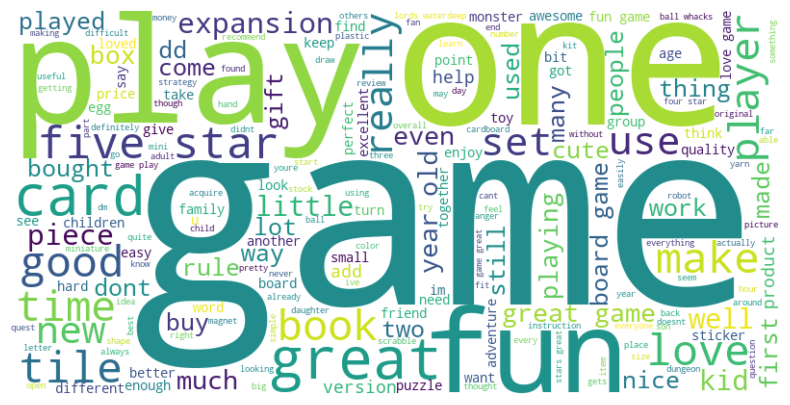

In [146]:
# Combine 'review_tokens' and 'summary_tokens' into a single list of words
all_words = [word for tokens in df_copy['review_tokens'] + df_copy['summary_tokens'] for word in tokens]

# Join all words into a single string
text = ' '.join(all_words)

# Create and plot the word cloud for combined tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud as a PNG file
# wordcloud.to_file("wordcloud.png")

In [147]:
# Create Frequency Distribution for 'all_words'
fdist_all_words = FreqDist(all_words)

# Display Frequency Distribution for 'all_words'
print("Frequency Distribution for 'all_words':")
# Display the 15 most common words
display(fdist_all_words.most_common(15))  

Frequency Distribution for 'all_words':


[('game', 1990),
 ('great', 875),
 ('fun', 770),
 ('one', 568),
 ('play', 528),
 ('like', 468),
 ('stars', 464),
 ('love', 416),
 ('good', 381),
 ('five', 362),
 ('really', 349),
 ('get', 333),
 ('tiles', 317),
 ('book', 316),
 ('time', 309)]

### Identify 15 most common words and polarity

In [151]:
# Define a function to calculate sentiment polarity for a word
def calculate_polarity(word):
    blob = TextBlob(word)
    return blob.sentiment.polarity

In [152]:
# Get the 15 most common words for 'review_tokens'
common_review_words = fdist_review.most_common(15)

# Calculate sentiment polarity for common 'review_tokens' words
sentiments_review = {word: calculate_polarity(word) for word, _ in common_review_words}
value_counts_review = {word: count for word, count in common_review_words}

In [153]:
# Display common words and their sentiment polarities for 'review_tokens'
print("Sentiment Analysis for 'review_tokens'")
for word, polarity in sentiments_review.items():
    print(f'Word: {word}, Count: {value_counts_review[word]}, Polarity: {polarity:.2f}')

Sentiment Analysis for 'review_tokens'
Word: the, Count: 5451, Polarity: 0.00
Word: and, Count: 3233, Polarity: 0.00
Word: to, Count: 3162, Polarity: 0.00
Word: a, Count: 3160, Polarity: 0.00
Word: of, Count: 2488, Polarity: 0.00
Word: i, Count: 2090, Polarity: 0.00
Word: it, Count: 2083, Polarity: 0.00
Word: is, Count: 1782, Polarity: 0.00
Word: this, Count: 1776, Polarity: 0.00
Word: game, Count: 1671, Polarity: -0.40
Word: for, Count: 1545, Polarity: 0.00
Word: with, Count: 1265, Polarity: 0.00
Word: you, Count: 1177, Polarity: 0.00
Word: in, Count: 1148, Polarity: 0.00
Word: that, Count: 1067, Polarity: 0.00


In [154]:
# Get the 15 most common words for 'summary_tokens'
common_summary_words = fdist_summary.most_common(15)

# Calculate sentiment polarity for common 'summary_tokens' words
sentiments_summary = {word: calculate_polarity(word) for word, _ in common_summary_words}
value_counts_summary = {word: count for word, count in common_summary_words}

In [155]:
# Display common words and their sentiment polarities for 'summary_tokens'
print("\nSentiment Analysis for 'summary_tokens'")
for word, polarity in sentiments_summary.items():
    print(f'Word: {word}, Count: {value_counts_summary[word]}, Polarity: {polarity:.2f}')# Get the 15 most common words for 'all_words' and calculate sentiment polarity
common_all_words = fdist_all_words.most_common(15)
sentiments_all_words = {word: calculate_polarity(word) for word, _ in common_all_words}
value_counts_all_words = {word: count for word, count in common_all_words}

# Display common words and their sentiment polarities for 'all_words'
print("\nSentiment Analysis for 'all_words'")
for word, polarity in sentiments_all_words.items():
    print(f'Word: {word}, Count: {value_counts_all_words[word]} Polarity: {polarity:.2f}')


Sentiment Analysis for 'summary_tokens'
Word: stars, Count: 427, Polarity: 0.00
Word: five, Count: 342, Polarity: 0.00
Word: game, Count: 319, Polarity: -0.40
Word: great, Count: 295, Polarity: 0.80
Word: the, Count: 261, Polarity: 0.00
Word: a, Count: 240, Polarity: 0.00
Word: for, Count: 232, Polarity: 0.00
Word: fun, Count: 218, Polarity: 0.30
Word: to, Count: 192, Polarity: 0.00
Word: and, Count: 168, Polarity: 0.00
Word: it, Count: 150, Polarity: 0.00
Word: of, Count: 139, Polarity: 0.00
Word: this, Count: 135, Polarity: 0.00
Word: is, Count: 103, Polarity: 0.00
Word: love, Count: 93, Polarity: 0.50


In [156]:
# Get the 15 most common words for 'all_words' and calculate sentiment polarity
common_all_words = fdist_all_words.most_common(15)
sentiments_all_words = {word: calculate_polarity(word) for word, _ in common_all_words}
value_counts_all_words = {word: count for word, count in common_all_words}

# Display common words and their sentiment polarities for 'all_words'
print("\nSentiment Analysis for 'all_words'")
for word, polarity in sentiments_all_words.items():
    print(f'Word: {word}, Count: {value_counts_all_words[word]} Polarity: {polarity:.2f}')


Sentiment Analysis for 'all_words'
Word: game, Count: 1990 Polarity: -0.40
Word: great, Count: 875 Polarity: 0.80
Word: fun, Count: 770 Polarity: 0.30
Word: one, Count: 568 Polarity: 0.00
Word: play, Count: 528 Polarity: 0.00
Word: like, Count: 468 Polarity: 0.00
Word: stars, Count: 464 Polarity: 0.00
Word: love, Count: 416 Polarity: 0.50
Word: good, Count: 381 Polarity: 0.70
Word: five, Count: 362 Polarity: 0.00
Word: really, Count: 349 Polarity: 0.20
Word: get, Count: 333 Polarity: 0.00
Word: tiles, Count: 317 Polarity: 0.00
Word: book, Count: 316 Polarity: 0.00
Word: time, Count: 309 Polarity: 0.00


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [159]:
# Provided function.
# Function to calculate sentiment polarity for a list of words
def extract_polarity(comment):
    return TextBlob(' '.join(comment)).sentiment.polarity

In [160]:
# Calculate polarity for 'review_tokens' column
df_copy['review_polarity'] = df_copy['review_tokens'].apply(extract_polarity)

# Calculate polarity for 'summary_tokens' column
df_copy['summary_polarity'] = df_copy['summary_tokens'].apply(extract_polarity)

# Combine 'review_tokens' and 'summary_tokens' into a single list of words for 'all_words'
df_copy['all_words'] = df_copy['review_tokens'] + df_copy['summary_tokens']

# Calculate polarity for 'all_words' column
df_copy['all_words_polarity'] = df_copy['all_words'].apply(extract_polarity)

# View output.
display(df_copy)

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          review_tokens  \
0     [comes, dms, screen, space, screen, absolute, ...   
1     [open, letter, unpainted, miniatures, bad, spe...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, previous, screens, completely, unnece...   
...                                                 ...   
1995  [perfect, word, game, mixed, ages, mom, perhap...   
1996  [great, game, think, would, like, first, recei...   
1997                 [great, game, keeps, mind, nimble]   
1998                                        [fun, game]   
1999  [game, fun, lot, like, scrabble, without, litt...   

                                         summary_tokens  review_polarity  \
0     [fact, space, wasted, art, terribly, informati...        -0.242857   
1        [another, worthless, dungeon, masters, screen]        -0.019468   
2                       [pretty, also, pretty, useless]         0.118243   
3                                         [five, stars]         0.578788   
4                                         [money, trap]        -0.316667   
...                                                 ...              ...   
1995            [perfect, word, game, mixed, ages, mom]         0.168750   
1996                                       [super, fun]         0.158333   
1997                                      [great, game]         0.200000   
1998                                      [four, stars]        -0.050000   
1999                                       [love, game]        -0.095833   

      summary_polarity                                          all_words  \
0            -0.600000  [comes, dms, screen, space, screen, absolute, ...   
1            -0.800000  [open, letter, unpainted, miniatures, bad, spe...   
2             0.000000  [nice, art, nice, printing, two, panels, fille...   
3             0.000000  [amazing, buy, bought, gift, new, dm, perfect,...   
4             0.000000  [review, previous, screens, completely, unnece...   
...                ...                                                ...   
1995          0.200000  [perfect, word, game, mixed, ages, mom, perhap...   
1996          0.316667  [great, game, think, would, like, first, recei...   
1997          0.200000    [great, game, keeps, mind, nimble, great, game]   
1998          0.000000                           [fun, game, four, stars]   
1999          0.050000  [game, fun, lot, like, scrabble, without, litt...   

      all_words_polarity  
0              -0.322222  
1              -0.062831  
2  

In [161]:
df_copy.describe()

review_polarity  summary_polarity  all_words_polarity
count      1961.000000       1961.000000         1961.000000
mean          0.210735          0.224019            0.231060
std           0.268045          0.340938            0.265888
min          -1.000000         -1.000000           -1.000000
25%           0.033333          0.000000            0.055871
50%           0.178125          0.100000            0.200000
75%           0.358333          0.500000            0.390000
max           1.000000          1.000000            1.000000

### Histograms for Polarity

Text(0, 0.5, 'Frequency')

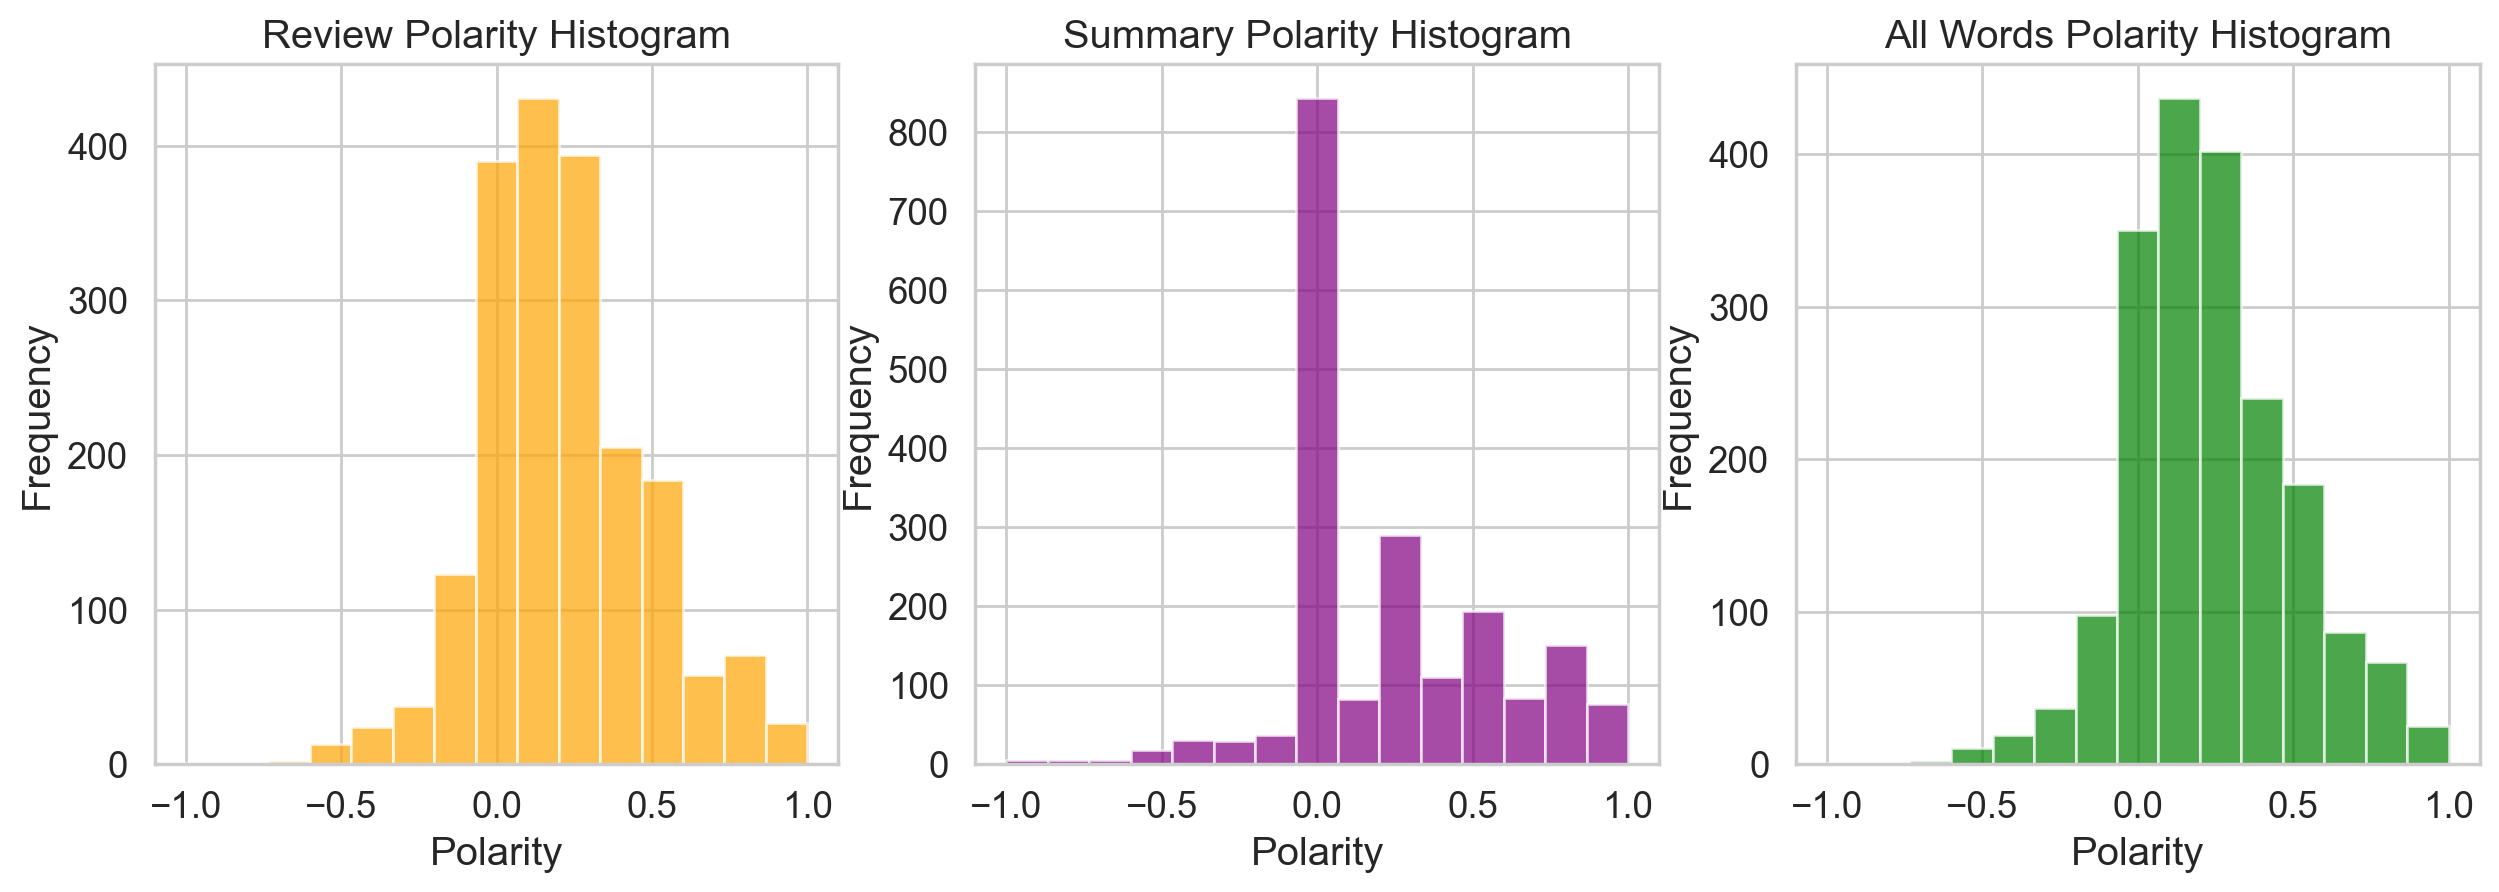

In [163]:
# Create histograms with 15 bins for each column
plt.figure(figsize=(15, 10), dpi=200)

# Review Polarity
plt.subplot(231)
plt.hist(df_copy['review_polarity'], bins=15, color='orange', alpha=0.7)
plt.title('Review Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Summary Polarity
plt.subplot(232)
plt.hist(df_copy['summary_polarity'], bins=15, color='purple', alpha=0.7)
plt.title('Summary Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# All Words Polarity
plt.subplot(233)
plt.hist(df_copy['all_words_polarity'], bins=15, color='green', alpha=0.7)
plt.title('All Words Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Save the entire figure as a PNG file
# plt.savefig("histograms_figure.png", bbox_inches='tight')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [166]:
# Top 20 negative reviews.
df_copy[['review', 'review_polarity']].sort_values(by='review_polarity').head(20)

review  review_polarity
208   booo  unles you are patient know how to measur...        -1.000000
526   keeps clients engaged while helping them devel...        -0.700000
174   i sent this product to my granddaughter the po...        -0.625000
182                  incomplete kit  very disappointing        -0.600000
538   i purchased this on the recommendation of two ...        -0.583333
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
173   horrible\nnothing more to say\nwould give zero...        -0.500000
117   i bought this as a christmas gift for my grand...        -0.500000
1524                         expensive for what you get        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
230                    i found the directions difficult        -0.500000
227   this was a gift for my daughter  i found it di...        -0.500000
1424  one word of caution if you use either expansio...        -0.487500
1058  i like wizards of the coasts game\nnot bad i t...        -0.480000
347   my 8 yearold granddaughter and i were very fru...        -0.450000
601   book is bound upside down very distracting to ...        -0.450000
476   confusing instructions and its not for 6 year ...        -0.433333
74    although 199 isnt much it was disappointing to...        -0.425000

In [167]:
# Top 20 negative summaries.
df_copy[['summary', 'summary_polarity']].sort_values(by='summary_polarity').head(20)

summary  summary_polarity
208    boring unless you are a craft person which i am             -1.000
829                                              boring            -1.000
173   horrible nothing more to say would give zero s...            -1.000
21                        the worst value ive ever seen            -1.000
1166  before this i hated running any rpg campaign d...            -0.900
1     another worthless dungeon masters screen from ...            -0.800
793                                        disappointed            -0.750
1620                                       disappointed            -0.750
144                                        disappointed            -0.750
631                                        disappointed            -0.750
363   promotes anger instead of teaching calming met...            -0.700
890                        bad qualityall made of paper            -0.700
885            too bad this is not what i was expecting            -0.700
518                                          mad dragon            -0.625
101                                    small and boring            -0.625
1015                                      disappointing            -0.600
1115                                      disappointing            -0.600
805                                       disappointing            -0.600
1804                                      disappointing            -0.600
0     the fact that 50 of this space is wasted on ar...            -0.600

In [168]:
# Top 20 positive reviews.
df_copy[['review', 'review_polarity']].sort_values(by='review_polarity', ascending=False).head(20)

review  review_polarity
1401  one of the best board games i played in along ...              1.0
1550  my daughter loves her stickers awesome seller ...              1.0
1168               best set buy 2 if you have the means              1.0
1177               awesome addition to my rpg gm system              1.0
194                                        awesome gift              1.0
609                                  delightful product              1.0
1715                                        awesome toy              1.0
496   excellent activity for teaching selfmanagement...              1.0
1726                  excellent toy to simulate thought              1.0
524                         perfect just what i ordered              1.0
1609  this was perfect to go with the 7 bean bags  i...              1.0
1967       perfect for tutoring my grandson in spelling              1.0
1301                                        its awesome              1.0
621   wonderful for my grandson to learn the resurre...              1.0
1135                                        awesome set              1.0
7                             came in perfect condition              1.0
933                                             awesome              1.0
1720  it is the best thing to play with and also min...              1.0
165                                        awesome book              1.0
591                                   wonderful product              1.0

In [169]:
# Top 20 positive summaries.
df_copy[['summary', 'summary_polarity']].sort_values(by='summary_polarity', ascending=False).head(20)

summary  summary_polarity
815                          one of the best games ever               1.0
657                                      awesome puzzle               1.0
1635                             wonderful way to learn               1.0
1630                              awesome learning tool               1.0
475                                           excellent               1.0
1724                       wonderful ball to manipulate               1.0
187                                             awesome               1.0
1729                                            awesome               1.0
1454                                  awesome expansion               1.0
80    theyre the perfect size to keep in the car or ...               1.0
647                                           wonderful               1.0
997                              best one in the series               1.0
1285  wanted more tiles but the box is an excellent ...               1.0
651               all f the mudpuppy toys are wonderful               1.0
1466                                best expansion ever               1.0
980                    the best among the dd boardgames               1.0
1270                                            awesome               1.0
1751                    best gift i ever gave the  kids               1.0
1078                                       perfect gift               1.0
731                        the best feedback i can have               1.0

In [170]:
# Use Vader to get an additional outlook on sentiments
import nltk
nltk.download('vader_lexicon')

# Import
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chanalvarez/nltk_data...


In [171]:
vader = SentimentIntensityAnalyzer()

In [174]:
	# Function to get compound score
def get_vader_score(text):
    if isinstance(text, str):
        return vader.polarity_scores(text)['compound']
    else:
        return None

# Apply to review column
df_copy['vader_compound'] = df_copy['review'].apply(get_vader_score)

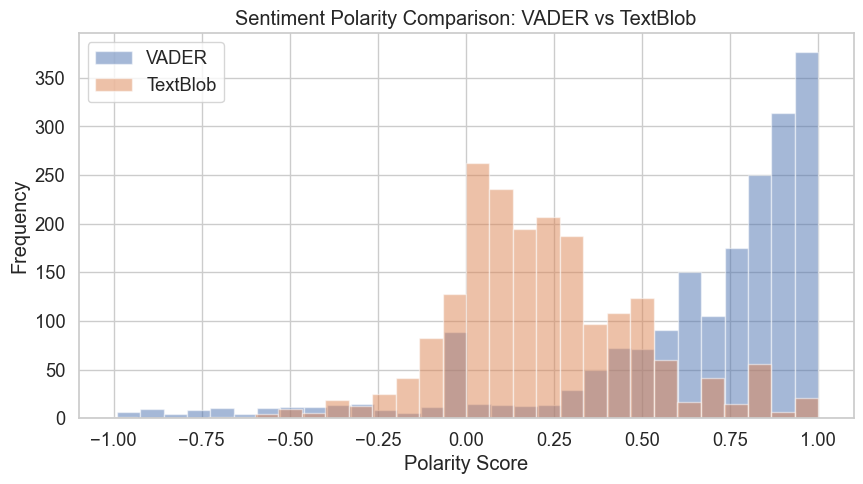

In [176]:
plt.figure(figsize=(10, 5))
plt.hist(df_copy['vader_compound'], bins=30, alpha=0.5, label='VADER')
plt.hist(df_copy['review_polarity'], bins=30, alpha=0.5, label='TextBlob')
plt.legend()
plt.title("Sentiment Polarity Comparison: VADER vs TextBlob")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Insights:

The distribution of VADER sentiment scores is notably skewed toward strong positivity, with the majority of compound scores exceeding 0.5 and a pronounced concentration between 0.9 and 1.0. This pattern suggests that VADER tends to classify a substantial proportion of reviews as highly positive. In contrast, TextBlob exhibits a more moderate and balanced distribution of sentiment scores, indicating a comparatively stricter and more conservative approach to sentiment classification.


## Sentiment Analysis Results

The mean polarity scores of 0.21 (reviews) and 0.22 (summaries) indicate an overall positive sentiment, with moderate variability (SD = 0.27 and 0.34). Quartile values show that most entries are neutral to mildly positive, confirming a generally optimistic tone.


Subjectivity averages of 0.51 (reviews) and 0.38 (summaries) suggest that reviews are more personal and descriptive, while summaries are shorter but convey stronger emotions.


Qualitative insights also show that positive feedback often emphasizes product enjoyment and family value, particularly for children’s use. In contrast, negative feedback centers on usability challenges and unmet expectations, indicating opportunities for improving product design or marketing communication.